# Telecom Churn Case Study

### Business Problem Overview
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

- For many incumbent operators, retaining high profitable customers is the number one business goal.

 

- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and Defining Churn
- There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

- In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

- However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

- Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

- This project is based on the Indian and Southeast Asian market.

### Definitions of Churn
- There are various ways to define churn, such as:

- **Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

    - The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

- **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

    - A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, we will use the usage-based definition to define churn.

### Understanding the Business Objective and the Data
- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn
- Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- **The ‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.

- **The ‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- **The ‘churn’ phase**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### The notebook is divided into the following broad sections.
- I. Loading and understanding the data
- II. Data Preperation
- III. EDA
- IV. Data Preprocessing
- V. PCA
- VI. Model Building 1: Random Forest Classifier
- VI. Model Building 2: Building Logistic Regression Model
- VII. Conclusion : Business Insights

## I. Loading and understanding the data

In [1]:
## importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix,roc_curve,roc_auc_score
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')

#### Initial look at the dataset

In [3]:
## resetting display options
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
##shape
telecom.shape

(99999, 226)

In [5]:
## head
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
## dtypes 
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

- Date columns listed as object. But we will have to see whether they are really important for the analysis to invest time in fixing their dtypes.
- Rest of the dtypes seem to be in order for now

In [7]:
## null value percentages
((telecom.isnull().sum()/len(telecom))*100).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

- Some columns have a really high null value percentages.
- Before dropping or imputing null values let's further analyse.

In [8]:
## looking for numeric continous and categorical columns
telecom.nunique().sort_values(ascending=False)

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

- Let's say that columns with less than 8 unique values constitute the categorical columns

In [9]:
## Number of categorical columns
len(telecom.nunique()[telecom.nunique()<8])

28

- So, initial analysis suggests that there are 28 categorical variables/columns.
- Some of these variables have just one value and as such they wont be usefeul for our analysis. Hence, we will be dsropping such columns/variables.

## II. Data Preperation
- Let's begin with data preperation
- Broad Objectives:
    - Handling missing values
    - Fixing Categorical Columns
    - Dropping Useless Columns/Variables
    - Filtering out High Valued Customers
    - Feature Engineering
    - Dummy Variable Creation
    - Identifying Categorical and Numeric Columns

### Handling Missing Values

In [10]:
## Again null value percentages
((telecom.isnull().sum()/len(telecom))*100).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

### Null values for recharge columns
- A Null value in these columns indicates no recharge, so we will be imputing them with 0.

In [11]:
## listing all the recharge columns
rech_cols = ['av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6',
             'av_rech_amt_data_7', 'max_rech_data_7', 'total_rech_data_7',
             'av_rech_amt_data_8', 'max_rech_data_8', 'total_rech_data_8',
             'av_rech_amt_data_9', 'max_rech_data_9', 'total_rech_data_9']

In [12]:
## imputing nulls with 0
telecom[rech_cols] = telecom[rech_cols].apply(lambda x: x.fillna(0))

In [13]:
## checking nulls in rech_cols
telecom[rech_cols].isnull().sum()

av_rech_amt_data_6    0
max_rech_data_6       0
total_rech_data_6     0
av_rech_amt_data_7    0
max_rech_data_7       0
total_rech_data_7     0
av_rech_amt_data_8    0
max_rech_data_8       0
total_rech_data_8     0
av_rech_amt_data_9    0
max_rech_data_9       0
total_rech_data_9     0
dtype: int64

- Null values fixed

### Fixing categorical columns
- A lot of categorical columns have just 1 value, these wont help in our analyis
- There a a few of our interest as per the business demand. Let's fix such columns

In [14]:
## listing categorical variables of interest
cat_vars = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [15]:
## checking null values in these
telecom[cat_vars].isnull().sum()/len(telecom[cat_vars])*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

- High null values percentages, but we can't drop these as they are of interest to our analyis.
- Let's impute the null values here with -1

In [16]:
# Replacing the missing value in categorical columns with -1
telecom[cat_vars] = telecom[cat_vars].apply(lambda x: x.fillna(-1))

In [17]:
## checking null values in these
telecom[cat_vars].isnull().sum()/len(telecom[cat_vars])*100

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

- Null values successfully replaced with -1. 

### Date Columns 
- They are of no use to our analysis, as some have just one unique values and others don't add valuable information
so we will be dropping them.

In [18]:
## list of date columns
date_cols = ['last_date_of_month_6', 'date_of_last_rech_6', 'date_of_last_rech_data_6',
             'last_date_of_month_7', 'date_of_last_rech_7', 'date_of_last_rech_data_7',
             'last_date_of_month_8', 'date_of_last_rech_8', 'date_of_last_rech_data_8',
             'last_date_of_month_9', 'date_of_last_rech_9', 'date_of_last_rech_data_9']

In [19]:
# Dropping the date_cols
telecom.drop(date_cols, axis = 1, inplace = True)

###  Columns with more than 70% of null values

In [20]:
# Extracting variables having missing value % greater than 70%
missing_percentage = round(100*(telecom.isnull().sum()/len(telecom.index)),2)
missing_percentage.loc[missing_percentage > 70]

vars_to_drop = list(missing_percentage[missing_percentage > 70].index)
vars_to_drop


['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [21]:
# Dropping the variables extracted in the above step
telecom.drop(vars_to_drop, axis = 1, inplace = True)

In [22]:
## checking null value percentages again
(telecom.isnull().sum()/len(telecom.index)*100).sort_values(ascending=False)

loc_og_t2m_mou_9      7.745077
offnet_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_mou_9          7.745077
std_ic_t2m_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_og_t2t_mou_9      7.745077
roam_og_mou_9         7.745077
spl_ic_mou_9          7.745077
std_ic_mou_9          7.745077
roam_ic_mou_9         7.745077
isd_og_mou_9          7.745077
std_og_t2m_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
spl_og_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
ic_others_9           7.745077
onnet_mou_9           7.745077
std_og_t2f_mou_9      7.745077
isd_ic_mou_9          7.745077
og_others_9           7.745077
std_ic_t2f_mou_9      7.745077
std_og_t2c_mou_9      7.745077
loc_ic_mou_9          7.745077
spl_ic_mou_8          5.378054
loc_ic_t2f_mou_8      5.378054
loc_og_mou_8          5.378054
std_og_t

- For rest of the columns we will use MICE imputation technique
- In our earlier trial of model building, we tried imputation by mode but the model was not satisfactory
- But we will do this after filtering out the high value customers as MICE is very expensive 
computationally
- We can afford to do this here as none of the columns that are required for filtering out the high valued customers have Null values and as such the null values wont affect that process.

###  Feature Engineering 1: Filtering out the High Value Customers
- Deriving New Features i.e Feature Engineering.
- We will derive new features from the 'good phase'.

-  As per Business requirement we need to filter High value customers
-  High value customers are those who have recharged with amount greater than 70th percentile of average total recharge amount   in the month June and July
-  We need to calculate total recharge amount which includes calls recharge amount and data recharge amount
-  Data recharge amount is not directly given and we need to calculate using the given data

In [23]:
# Calculate total data recharge amount for June and July
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

In [24]:
# Calculate total recharge amount for June and July
telecom['total_amt_6'] = telecom['total_rech_amt_6'] + telecom['total_data_rech_amt_6']
telecom['total_amt_7'] = telecom['total_rech_amt_7'] + telecom['total_data_rech_amt_7']

In [25]:
# We need to calculate the average of total amount
telecom['av_amt_6_7'] = (telecom['total_amt_6'] + telecom['total_amt_7'])/2

In [26]:
# Now we need to find the 70th percentile of average of total amount
telecom['av_amt_6_7'].quantile(0.7)

478.0

In [27]:
# Retain only those customers who have recharged with amount greater than or equal to 70th percentile of average total amount
telecom_hv = telecom.loc[telecom['av_amt_6_7'] >= telecom['av_amt_6_7'].quantile(0.7)]
telecom_hv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_amt_6,total_amt_7,av_amt_6_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,

In [28]:
## resetting index
telecom_hv = telecom_hv.reset_index(drop=True)
telecom_hv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_amt_6,total_amt_7,av_amt_6_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,

In [29]:
## shape
telecom_hv.shape

(30001, 203)

- Now that we have about 70% smaller database, let's go for MICE imputation

## MICE imputation

In [30]:
## now checking null value percentages
(telecom_hv.isnull().sum()/len(telecom_hv.index)*100).sort_values(ascending=False)

og_others_9              6.336455
std_ic_mou_9             6.336455
roam_og_mou_9            6.336455
loc_og_t2t_mou_9         6.336455
std_ic_t2m_mou_9         6.336455
loc_og_t2m_mou_9         6.336455
loc_og_t2f_mou_9         6.336455
loc_og_t2c_mou_9         6.336455
std_ic_t2o_mou_9         6.336455
loc_og_mou_9             6.336455
std_og_t2t_mou_9         6.336455
roam_ic_mou_9            6.336455
spl_og_mou_9             6.336455
std_og_t2m_mou_9         6.336455
std_og_t2f_mou_9         6.336455
spl_ic_mou_9             6.336455
std_og_t2c_mou_9         6.336455
std_og_mou_9             6.336455
isd_ic_mou_9             6.336455
isd_og_mou_9             6.336455
std_ic_t2t_mou_9         6.336455
std_ic_t2f_mou_9         6.336455
ic_others_9              6.336455
onnet_mou_9              6.336455
loc_ic_t2f_mou_9         6.336455
loc_ic_mou_9             6.336455
offnet_mou_9             6.336455
loc_ic_t2t_mou_9         6.336455
loc_ic_t2m_mou_9         6.336455
std_og_t2f_mou

In [31]:
## importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
## first let's drop mobile number and circle ID
telecom_hv.drop(['mobile_number','circle_id'],axis=1,inplace=True)


In [34]:
## instantiating mice imputer object
mice_imputer = IterativeImputer()

In [35]:
## imputing missing values
## will give us an array
## lets call it telecom_hv1
telecom_hv1 = mice_imputer.fit_transform(telecom_hv)

In [36]:
## converting telecom_hv1 to dataframe
telecom_hv1 = pd.DataFrame(telecom_hv1)

In [37]:
## assigning column names
telecom_hv1.columns = telecom_hv.columns

In [38]:
## checking null value percentages
(telecom_hv1.isnull().sum()/len(telecom_hv1.index)*100).sort_values(ascending=False)

av_amt_6_7               0.0
std_og_mou_9             0.0
og_others_7              0.0
og_others_6              0.0
spl_og_mou_9             0.0
spl_og_mou_8             0.0
spl_og_mou_7             0.0
spl_og_mou_6             0.0
isd_og_mou_9             0.0
isd_og_mou_8             0.0
isd_og_mou_7             0.0
isd_og_mou_6             0.0
std_og_mou_8             0.0
std_ic_t2m_mou_6         0.0
std_og_mou_7             0.0
std_og_mou_6             0.0
std_og_t2c_mou_9         0.0
std_og_t2c_mou_8         0.0
std_og_t2c_mou_7         0.0
std_og_t2c_mou_6         0.0
std_og_t2f_mou_9         0.0
std_og_t2f_mou_8         0.0
std_og_t2f_mou_7         0.0
std_og_t2f_mou_6         0.0
og_others_8              0.0
og_others_9              0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
std_ic_t2t_mou_8         0.0
std_ic_t2t_mou_7         0.0
std_ic_t2t_mou_6         0.0
loc_ic_mou_9             0.0
loc_ic_mou_8             0.0
loc_ic_mou_7             0.0
loc_ic_mou_6  

- NO null values!

### Dropping columns with just one unique value 
- As they won't help in our analysis

In [40]:
num_unique = telecom_hv1.nunique()

In [41]:
## filtering columns wiht just one unique value
col_1 = list(num_unique[num_unique ==1 ].index)

In [42]:
## dropping those columns
telecom_hv1.drop(col_1,axis=1,inplace=True)

In [43]:
## again checking for single value columns
telecom_hv1.nunique().sort_values(ascending=True)

night_pck_user_7             3
night_pck_user_9             3
fb_user_6                    3
fb_user_8                    3
fb_user_9                    3
fb_user_7                    3
night_pck_user_8             3
night_pck_user_6             3
monthly_2g_9                 5
monthly_2g_6                 5
monthly_2g_7                 6
monthly_2g_8                 6
monthly_3g_9                11
monthly_3g_8                12
monthly_3g_6                12
monthly_3g_7                15
sachet_3g_6                 25
sachet_3g_9                 27
sachet_3g_7                 27
sachet_3g_8                 29
sachet_2g_6                 31
sachet_2g_9                 32
sachet_2g_8                 34
sachet_2g_7                 35
total_rech_data_9           38
total_rech_data_6           38
total_rech_data_7           43
total_rech_data_8           47
max_rech_data_6             48
max_rech_data_9             49
max_rech_data_8             49
max_rech_data_7             49
total_re

- No column for single values present.

### Dropping the columns for which we have derived features 

In [44]:
# Dropping the variables 
telecom_hv1.drop(['total_data_rech_amt_6','total_data_rech_amt_7',
                         'total_amt_6','total_amt_7','av_amt_6_7'], axis = 1, inplace = True)

### Feature Engineering 2: Deriving Target Variable

-  Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
-  9th month is the churn phase
-  Attributes to tag churners are:
    -  total_ic_mou_9
    -  total_og_mou_9
    -  vol_2g_mb_9
    -  vol_3g_mb_9

In [45]:
# Creating the target variable
telecom_hv1['target'] = (telecom_hv1[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1) == 0).astype(int)
telecom_hv1.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,target
0,197.385,214.816,213.803,21.100,-219.40905,-198.485939,0.00,-210.722255,288.383848,284.301243,0.00,221.600209,33.694507,13.250245,0.00,12.608358,30.215415,11.154199,0.00,1.389715,-192.019269,-235.939105,0.00,-195.589408,166.259313,165.972199,0.00,153.246945,6.455171,6.538511,0.00,6.144773,2.753958,-0.270008,0.00,1.663598,-19.376708,-63.394507,0.00,-36.180338,60.809299,65.222869,0.00,47.814177,182.746647,191.340458,0.00,146.844343,1.837694,1.849486,0.00,1.613457,245.374353,258.432415,0.00,196.259833,-232.470025,-202.346535,0.00,-166.053567,5.921036,7.236029,0.00,5.893324,0.668464,0.081944,0.0,0.105035,0.00,0.00,0.00,0.00,-79.343073,-91.724669,0.16,-80.226166,153.193461,154.386209,4.13,147.250771,15.56164,16.329808,1.15,15.626989,89.366446,78.967762,5.44,82.653806,-39.892599,-40.216879,0.00,-36.446387,29.735181,31.384525,0.00,26.997867,2.745235,2.84766,0.00,2.744757,-7.426147,-5.9984,0.00,-6.709252,0.00,0.00,5.44,0.00,-92.952779,-85.26947,0.0,-88.131641,10.569836,10.976606,0.00,11.059586,1.173041,1.526773,0.00,1.391138,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [46]:
# Finding the churn rate
churn_rate = round(100 * (telecom_hv1['target'].value_counts()/len(telecom_hv1.index)),2)
churn_rate

0    91.86
1     8.14
Name: target, dtype: float64

In [47]:
# Extract 9th month features from dataframe
cols_9_list = telecom_hv1.filter(regex = '[9]$', axis = 1).columns
cols_9_list

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')

In [48]:
# Dropping the 9th month features to avoid target leakage
telecom_hv1.drop(cols_9_list, axis = 1, inplace = True)

In [49]:
## checking shape
telecom_hv1.shape

(30001, 141)

### Feature Engineering 3: Deriving new  features as the difference between the 'action phase' and the 'good phase' derived features during Feature Engineering 1

In [50]:
# Deriving new features by taking difference in usage between 8th month and average usage of 6th and 7th month
telecom_hv1['arpu_diff'] = telecom_hv1['arpu_8'] - ((telecom_hv1['arpu_6'] + telecom_hv1['arpu_7'])/2)
telecom_hv1['onnet_mou_diff'] = telecom_hv1['onnet_mou_8'] - ((telecom_hv1['onnet_mou_6'] + telecom_hv1['onnet_mou_7'])/2)

telecom_hv1['offnet_mou_diff'] = telecom_hv1['offnet_mou_8'] - ((telecom_hv1['offnet_mou_6'] + telecom_hv1['offnet_mou_7'])/2)

telecom_hv1['roam_ic_mou_diff'] = telecom_hv1['roam_ic_mou_8'] - ((telecom_hv1['roam_ic_mou_6'] + telecom_hv1['roam_ic_mou_7'])/2)

telecom_hv1['roam_og_mou_diff'] = telecom_hv1['roam_og_mou_8'] - ((telecom_hv1['roam_og_mou_6'] + telecom_hv1['roam_og_mou_7'])/2)

telecom_hv1['loc_og_mou_diff'] = telecom_hv1['loc_og_mou_8'] - ((telecom_hv1['loc_og_mou_6'] + telecom_hv1['loc_og_mou_7'])/2)

telecom_hv1['std_og_mou_diff'] = telecom_hv1['std_og_mou_8'] - ((telecom_hv1['std_og_mou_6'] + telecom_hv1['std_og_mou_7'])/2)

telecom_hv1['isd_og_mou_diff'] = telecom_hv1['isd_og_mou_8'] - ((telecom_hv1['isd_og_mou_6'] + telecom_hv1['isd_og_mou_7'])/2)

telecom_hv1['spl_og_mou_diff'] = telecom_hv1['spl_og_mou_8'] - ((telecom_hv1['spl_og_mou_6'] + telecom_hv1['spl_og_mou_7'])/2)

telecom_hv1['total_og_mou_diff'] = telecom_hv1['total_og_mou_8'] - ((telecom_hv1['total_og_mou_6'] + telecom_hv1['total_og_mou_7'])/2)

telecom_hv1['loc_ic_mou_diff'] = telecom_hv1['loc_ic_mou_8'] - ((telecom_hv1['loc_ic_mou_6'] + telecom_hv1['loc_ic_mou_7'])/2)

telecom_hv1['std_ic_mou_diff'] = telecom_hv1['std_ic_mou_8'] - ((telecom_hv1['std_ic_mou_6'] + telecom_hv1['std_ic_mou_7'])/2)

telecom_hv1['isd_ic_mou_diff'] = telecom_hv1['isd_ic_mou_8'] - ((telecom_hv1['isd_ic_mou_6'] + telecom_hv1['isd_ic_mou_7'])/2)

telecom_hv1['spl_ic_mou_diff'] = telecom_hv1['spl_ic_mou_8'] - ((telecom_hv1['spl_ic_mou_6'] + telecom_hv1['spl_ic_mou_7'])/2)

telecom_hv1['total_ic_mou_diff'] = telecom_hv1['total_ic_mou_8'] - ((telecom_hv1['total_ic_mou_6'] + telecom_hv1['total_ic_mou_7'])/2)

telecom_hv1['total_rech_num_diff'] = telecom_hv1['total_rech_num_8'] - ((telecom_hv1['total_rech_num_6'] + telecom_hv1['total_rech_num_7'])/2)

telecom_hv1['total_rech_amt_diff'] = telecom_hv1['total_rech_amt_8'] - ((telecom_hv1['total_rech_amt_6'] + telecom_hv1['total_rech_amt_7'])/2)

telecom_hv1['max_rech_amt_diff'] = telecom_hv1['max_rech_amt_8'] - ((telecom_hv1['max_rech_amt_6'] + telecom_hv1['max_rech_amt_7'])/2)

telecom_hv1['total_rech_data_diff'] = telecom_hv1['total_rech_data_8'] - ((telecom_hv1['total_rech_data_6'] + telecom_hv1['total_rech_data_7'])/2)

telecom_hv1['max_rech_data_diff'] = telecom_hv1['max_rech_data_8'] - ((telecom_hv1['max_rech_data_6'] + telecom_hv1['max_rech_data_7'])/2)

telecom_hv1['av_rech_amt_data_diff'] = telecom_hv1['av_rech_amt_data_8'] - ((telecom_hv1['av_rech_amt_data_6'] + telecom_hv1['av_rech_amt_data_7'])/2)

telecom_hv1['vol_2g_mb_diff'] = telecom_hv1['vol_2g_mb_8'] - ((telecom_hv1['vol_2g_mb_6'] + telecom_hv1['vol_2g_mb_7'])/2)

telecom_hv1['vol_3g_mb_diff'] = telecom_hv1['vol_3g_mb_8'] - ((telecom_hv1['vol_3g_mb_6'] + telecom_hv1['vol_3g_mb_7'])/2)

### Creating Dummy Variables for Categorical Columns

In [51]:
## removing 'night_pck_user_9' from cat_vars
cat_vars.remove('night_pck_user_9')

In [52]:
## removing 'fb_user_9' from cat_vars
cat_vars.remove('fb_user_9')

In [53]:
## creating dummy variables and saving a copy of the dataframe
telecom_hv1 = pd.get_dummies(telecom_hv1,columns = cat_vars,drop_first=True).copy()

In [54]:
telecom_hv1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,target,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,197.385,214.816,213.803,-219.40905,-198.485939,0.00,288.383848,284.301243,0.00,33.694507,13.250245,0.00,30.215415,11.154199,0.00,-192.019269,-235.939105,0.00,166.259313,165.972199,0.00,6.455171,6.538511,0.00,2.753958,-0.270008,0.00,-19.376708,-63.394507,0.00,60.809299,65.222869,0.00,182.746647,191.340458,0.00,1.837694,1.849486,0.00,245.374353,258.432415,0.00,-232.470025,-202.346535,0.00,5.921036,7.236029,0.00,0.668464,0.081944,0.0,0.00,0.00,0.00,-79.343073,-91.724669,0.16,153.193461,154.386209,4.13,15.56164,16.329808,1.15,89.366446,78.967762,5.44,-39.892599,-40.216879,0.00,29.735181,31.384525,0.00,2.745235,2.84766,0.00,-7.426147,-5.9984,0.00,0.00,0.00,5.44,-92.952779,-85.26947,0.0,10.569836,10.976606,0.00,1.173041,1.526773,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,1,7.7025,208.947495,-286.342546,-23.472376,-20.684807,41.385608,-251.903384,217.40828,-6.578532,0.000,-78.727104,6.712273,-10.773221,89.111125,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,1,0,1,0,1,0,0,1,0,1,0,1
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,2

- Dummy varaibles successfull created

In [55]:
telecom_hv1.shape

(30001, 170)

In [56]:
telecom_hv1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,target,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,197.385,214.816,213.803,-219.40905,-198.485939,0.00,288.383848,284.301243,0.00,33.694507,13.250245,0.00,30.215415,11.154199,0.00,-192.019269,-235.939105,0.00,166.259313,165.972199,0.00,6.455171,6.538511,0.00,2.753958,-0.270008,0.00,-19.376708,-63.394507,0.00,60.809299,65.222869,0.00,182.746647,191.340458,0.00,1.837694,1.849486,0.00,245.374353,258.432415,0.00,-232.470025,-202.346535,0.00,5.921036,7.236029,0.00,0.668464,0.081944,0.0,0.00,0.00,0.00,-79.343073,-91.724669,0.16,153.193461,154.386209,4.13,15.56164,16.329808,1.15,89.366446,78.967762,5.44,-39.892599,-40.216879,0.00,29.735181,31.384525,0.00,2.745235,2.84766,0.00,-7.426147,-5.9984,0.00,0.00,0.00,5.44,-92.952779,-85.26947,0.0,10.569836,10.976606,0.00,1.173041,1.526773,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,1,7.7025,208.947495,-286.342546,-23.472376,-20.684807,41.385608,-251.903384,217.40828,-6.578532,0.000,-78.727104,6.712273,-10.773221,89.111125,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,1,0,1,0,1,0,0,1,0,1,0,1
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,2

### Identifying categorical and numeric columns

- Let's identify the categorical and numeric continous columns before wew move ahead.
- We need to know this disticntion as it qill be helpful during scaling

In [57]:
cols = telecom_hv1.nunique().sort_values(ascending=True)

In [58]:
## list of categorical columns
cat_cols = list(cols[cols < 8 ].index)
cat_cols

['fb_user_8_1.0',
 'fb_user_7_1.0',
 'fb_user_7_0.0',
 'fb_user_6_1.0',
 'fb_user_6_0.0',
 'night_pck_user_8_1.0',
 'night_pck_user_8_0.0',
 'night_pck_user_7_1.0',
 'night_pck_user_7_0.0',
 'night_pck_user_6_1.0',
 'night_pck_user_6_0.0',
 'fb_user_8_0.0',
 'target',
 'monthly_2g_6',
 'monthly_2g_8',
 'monthly_2g_7']

In [59]:
## list of numeric columns
cols_list = list(telecom_hv1.columns)
cols_list

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [60]:
## getiing the numeric columns
num_cols = [i for i in cols_list if i not in cat_cols ]
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## III. EDA
- Creating two separate sub dataframes out of the orignal dataframa name 
telecom_hv_num of continous variables and telecom_hv_cat of categorical variables.
- Since there are so many variables, we will do EDA analysis and data visualisation for only some variables to gauge a generic trend.

In [61]:
## telecom_hv_num
telecom_hv_num = telecom_hv1[num_cols]
telecom_hv_num.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,-219.40905,-198.485939,0.00,288.383848,284.301243,0.00,33.694507,13.250245,0.00,30.215415,11.154199,0.00,-192.019269,-235.939105,0.00,166.259313,165.972199,0.00,6.455171,6.538511,0.00,2.753958,-0.270008,0.00,-19.376708,-63.394507,0.00,60.809299,65.222869,0.00,182.746647,191.340458,0.00,1.837694,1.849486,0.00,245.374353,258.432415,0.00,-232.470025,-202.346535,0.00,5.921036,7.236029,0.00,0.668464,0.081944,0.0,0.00,0.00,0.00,-79.343073,-91.724669,0.16,153.193461,154.386209,4.13,15.56164,16.329808,1.15,89.366446,78.967762,5.44,-39.892599,-40.216879,0.00,29.735181,31.384525,0.00,2.745235,2.84766,0.00,-7.426147,-5.9984,0.00,0.00,0.00,5.44,-92.952779,-85.26947,0.0,10.569836,10.976606,0.00,1.173041,1.526773,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,7.7025,208.947495,-286.342546,-23.472376,-20.684807,41.385608,-251.903384,217.40828,-6.578532,0.000,-78.727104,6.712273,-10.773221,89.111125,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.16000,101.460000,39.53,427.880000,355

In [62]:
## shape
telecom_hv_num.shape

(30001, 154)

In [63]:
## telecom_hv_cat
telecom_hv_cat = telecom_hv1[cat_cols]
telecom_hv_cat.head()

,fb_user_8_1.0,fb_user_7_1.0,fb_user_7_0.0,fb_user_6_1.0,fb_user_6_0.0,night_pck_user_8_1.0,night_pck_user_8_0.0,night_pck_user_7_1.0,night_pck_user_7_0.0,night_pck_user_6_1.0,night_pck_user_6_0.0,fb_user_8_0.0,target,monthly_2g_6,monthly_2g_8,monthly_2g_7
0,1,1,0,1,0,0,1,0,1,0,1,0,1,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0
2,1,1,0,0,0,0,1,0,1,0,0,0,0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1,1,0,0,0,0,1,0,1,0,0,0,0,0.0,0.0,0.0


In [64]:
## shape
telecom_hv_cat.shape

(30001, 16)

In [65]:
## looking at the spread of values
telecom_hv_num.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

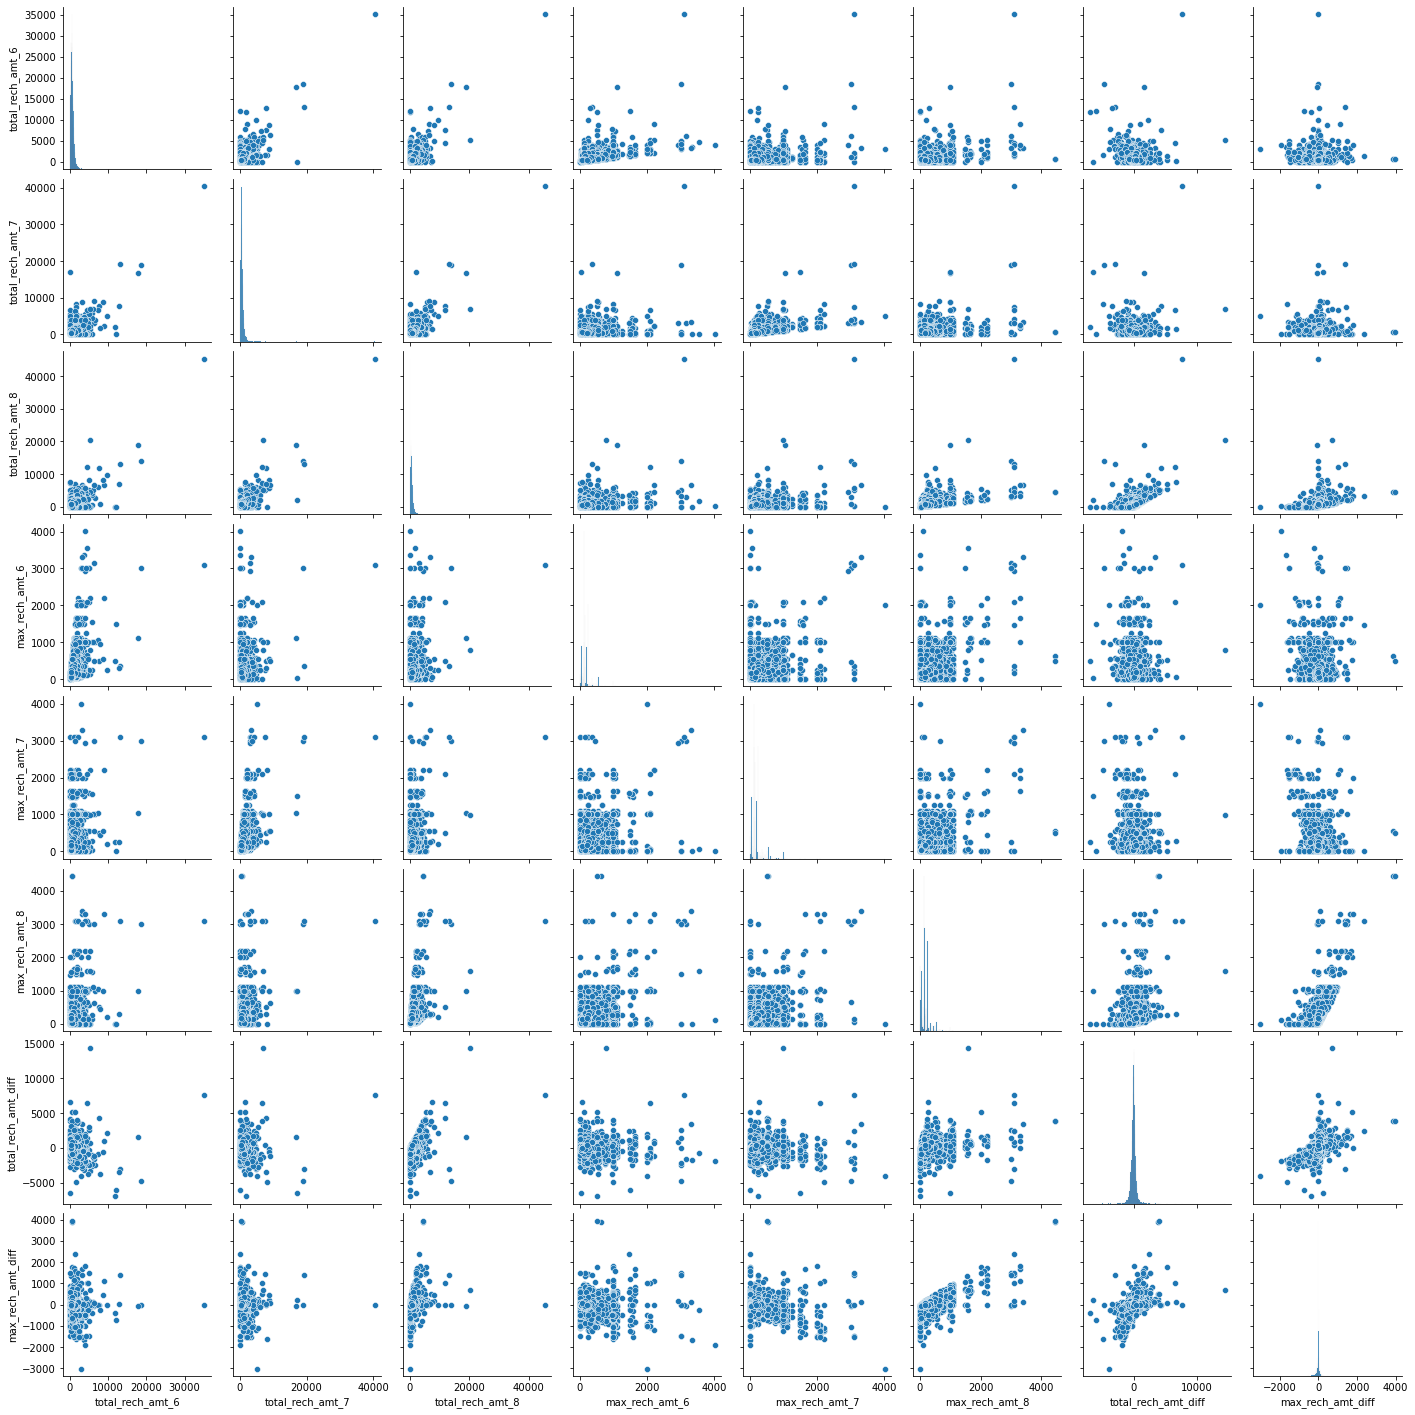

In [66]:
## pairplot between total and max recharge amount variables
sns.pairplot(telecom_hv_num[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
                           'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
                           'total_rech_amt_diff','max_rech_amt_diff' ]])
plt.show()

- No clearly discernible linear patterns

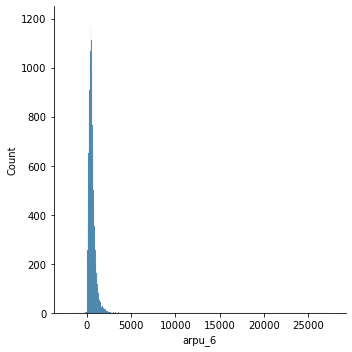

In [67]:
## random displot for arpu_6
sns.displot(data=telecom_hv_num,x='arpu_6')
plt.show()

- Skewed distribution, potential outliers

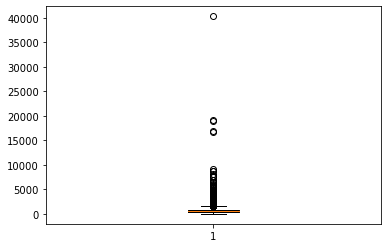

In [68]:
plt.boxplot(telecom_hv_num['total_rech_amt_7'])
plt.show()

- Few outliers

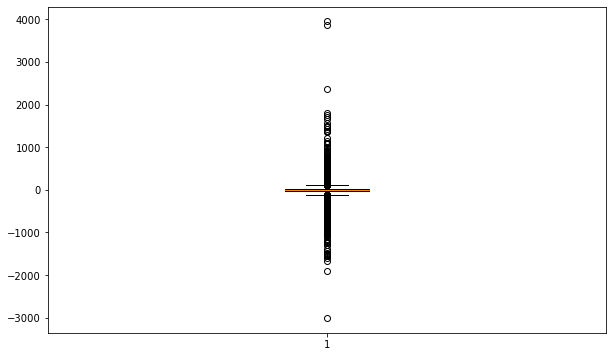

In [69]:
plt.figure(figsize=(10,6))
plt.boxplot(telecom_hv_num['max_rech_amt_diff'])
plt.show()

- Few outliers

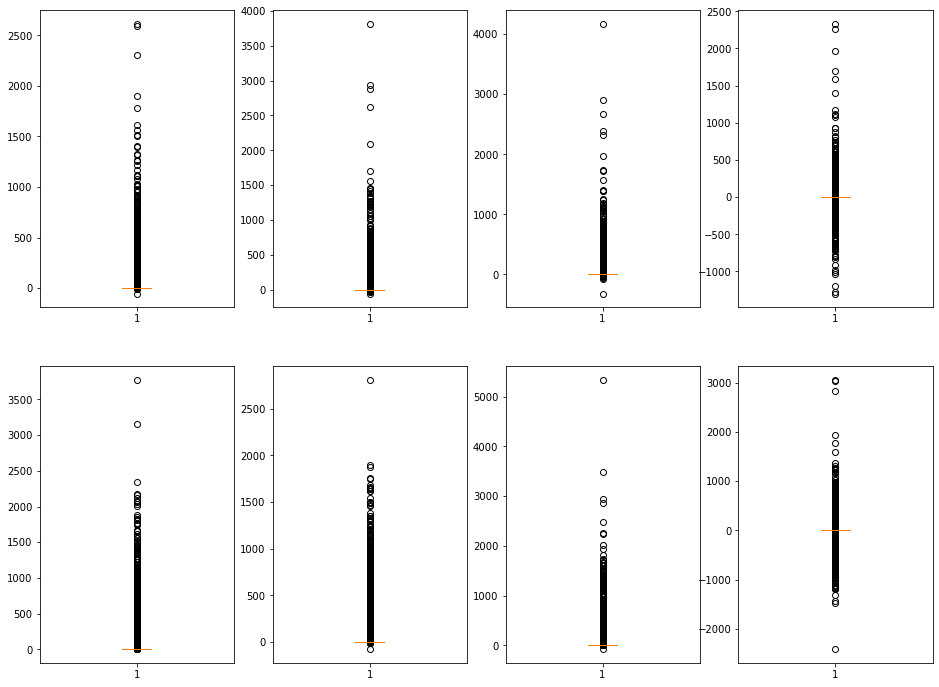

In [70]:
## Boxplots for roaming features
plt.figure(figsize=(16,12))
plt.subplot(2,4,1)
plt.boxplot(telecom_hv_num['roam_ic_mou_6'])
plt.subplot(2,4,2)
plt.boxplot(telecom_hv_num['roam_ic_mou_7'])
plt.subplot(2,4,3)
plt.boxplot(telecom_hv_num['roam_ic_mou_8'])
plt.subplot(2,4,4)
plt.boxplot(telecom_hv_num['roam_ic_mou_diff'])
plt.subplot(2,4,5)
plt.boxplot(telecom_hv_num['roam_og_mou_6'])
plt.subplot(2,4,6)
plt.boxplot(telecom_hv_num['roam_og_mou_7'])
plt.subplot(2,4,7)
plt.boxplot(telecom_hv_num['roam_og_mou_8'])
plt.subplot(2,4,8)
plt.boxplot(telecom_hv_num['roam_og_mou_diff'])
plt.show()

- Indication of some outliers

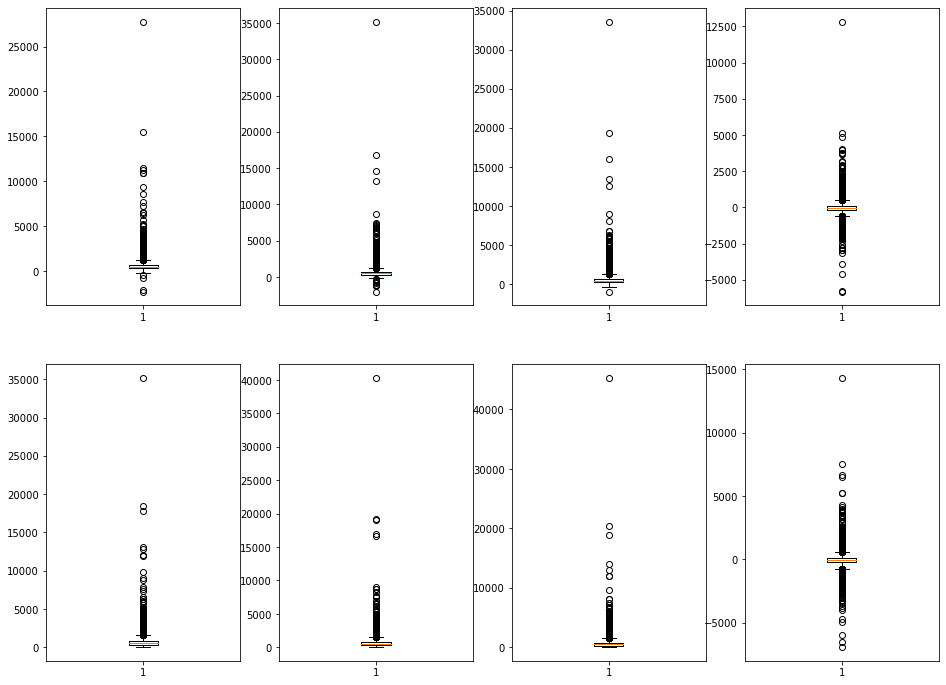

In [71]:
## Boxplots for average revenue per user features
plt.figure(figsize=(16,12))
plt.subplot(2,4,1)
plt.boxplot(telecom_hv_num['arpu_6'])
plt.subplot(2,4,2)
plt.boxplot(telecom_hv_num['arpu_7'])
plt.subplot(2,4,3)
plt.boxplot(telecom_hv_num['arpu_8'])
plt.subplot(2,4,4)
plt.boxplot(telecom_hv_num['arpu_diff'])
plt.subplot(2,4,5)
plt.boxplot(telecom_hv_num['total_rech_amt_6'])
plt.subplot(2,4,6)
plt.boxplot(telecom_hv_num['total_rech_amt_7'])
plt.subplot(2,4,7)
plt.boxplot(telecom_hv_num['total_rech_amt_8'])
plt.subplot(2,4,8)
plt.boxplot(telecom_hv_num['total_rech_amt_diff'])
plt.show()

- Few outliers

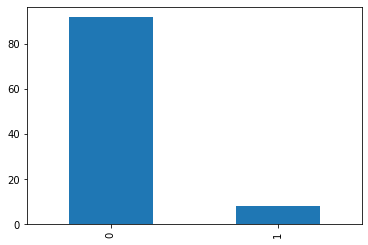

In [72]:
## target variable
(telecom_hv1['target'].value_counts(1)*100).plot(kind='bar')
plt.show()

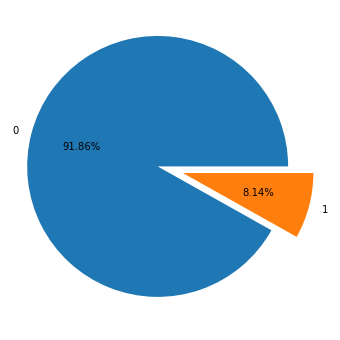

In [663]:
plt.figure(figsize = [6,6])
plt.pie(churn_rate, autopct = "%.2f%%", labels = churn_rate.keys(), explode = [0.1]*2)
plt.show()

- High class imbalance between 0's and 1's. This will have to be adressed while building and  training the models.

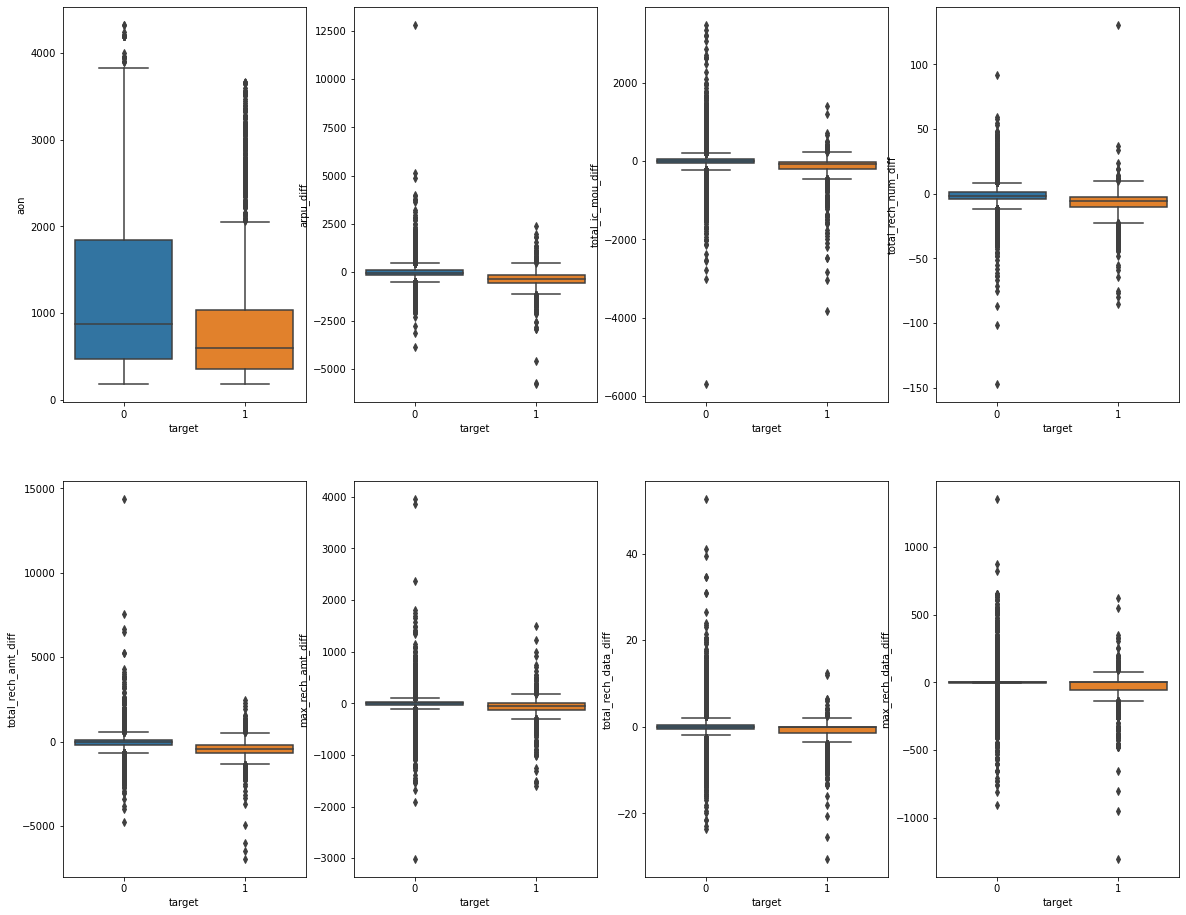

In [76]:
## Boxplots of the target variable some with some driver variables.
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(telecom_hv1['target'],telecom_hv1['aon'])
plt.subplot(2,4,2)
sns.boxplot(telecom_hv1['target'],telecom_hv1['arpu_diff'])
plt.subplot(2,4,3)
sns.boxplot(telecom_hv1['target'],telecom_hv1['total_ic_mou_diff'])
plt.subplot(2,4,4)
sns.boxplot(telecom_hv1['target'],telecom_hv1['total_rech_num_diff'])
plt.subplot(2,4,5)
sns.boxplot(telecom_hv1['target'],telecom_hv1['total_rech_amt_diff'])
plt.subplot(2,4,6)
sns.boxplot(telecom_hv1['target'],telecom_hv1['max_rech_amt_diff'])
plt.subplot(2,4,7)
sns.boxplot(telecom_hv1['target'],telecom_hv1['total_rech_data_diff'])
plt.subplot(2,4,8)
sns.boxplot(telecom_hv1['target'],telecom_hv1['max_rech_data_diff'])
plt.show()

- Age on network or AON seems to impact the churn behaviour, i,e customers with the operator with a long time are less likely to churn.
- Rest other features considered here dont show much variation between churn and non-churn

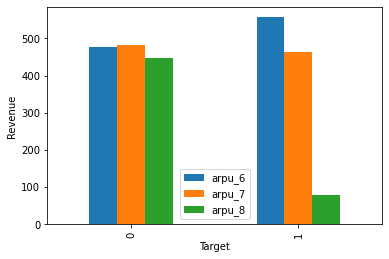

In [658]:
# PLot to visualize the average revenue per user 'arpu' for 6th , 7th and 8th month
telecom_hv1.groupby('target')['arpu_6', 'arpu_7', 'arpu_8'].median().plot.bar()
plt.xlabel('Target')
plt.ylabel('Revenue')
plt.show()

- For the customers who churn, the apru drops steadily from months 6 to 7 to 8.

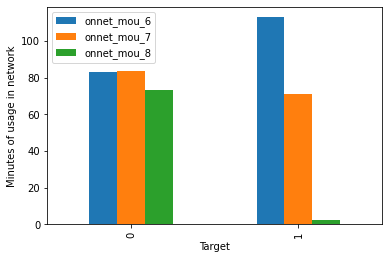

In [659]:
# Plot to visualize the onnet_mou
telecom_hv1.groupby('target')['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'].median().plot.bar()
plt.xlabel('Target')
plt.ylabel('Minutes of usage in network')
plt.show()

- The on network minutes also drop steadily from months 6 to 8 for the churn customers.

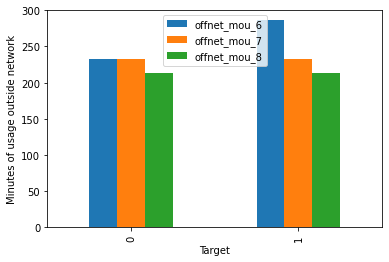

In [660]:
# Plot to visualize the offnet_mou
telecom_hv1.groupby('target')['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'].median().plot.bar()
plt.xlabel('Target')
plt.ylabel('Minutes of usage outside network')
plt.show()

- The off network minutes also drop steadily from months 6 to 8 for the churn customers.

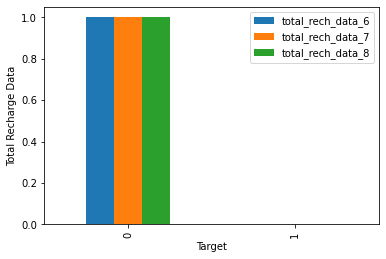

In [661]:
# Plot to visualize the total_rech_data
telecom_hv1.groupby('target')['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'].median().plot.bar()
plt.xlabel('Target')
plt.ylabel('Total Recharge Data')
plt.show()

- No insights onto the total recharge data for the churn customers.

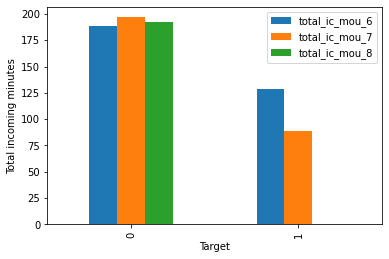

In [662]:
# Plot to visualize the total_ic_mou
telecom_hv1.groupby('target')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].median().plot.bar()
plt.xlabel('Target')
plt.ylabel('Total incoming minutes')
plt.show()

- Total incoming minutes virtually drop to zero in the eighth month for the churn customers.

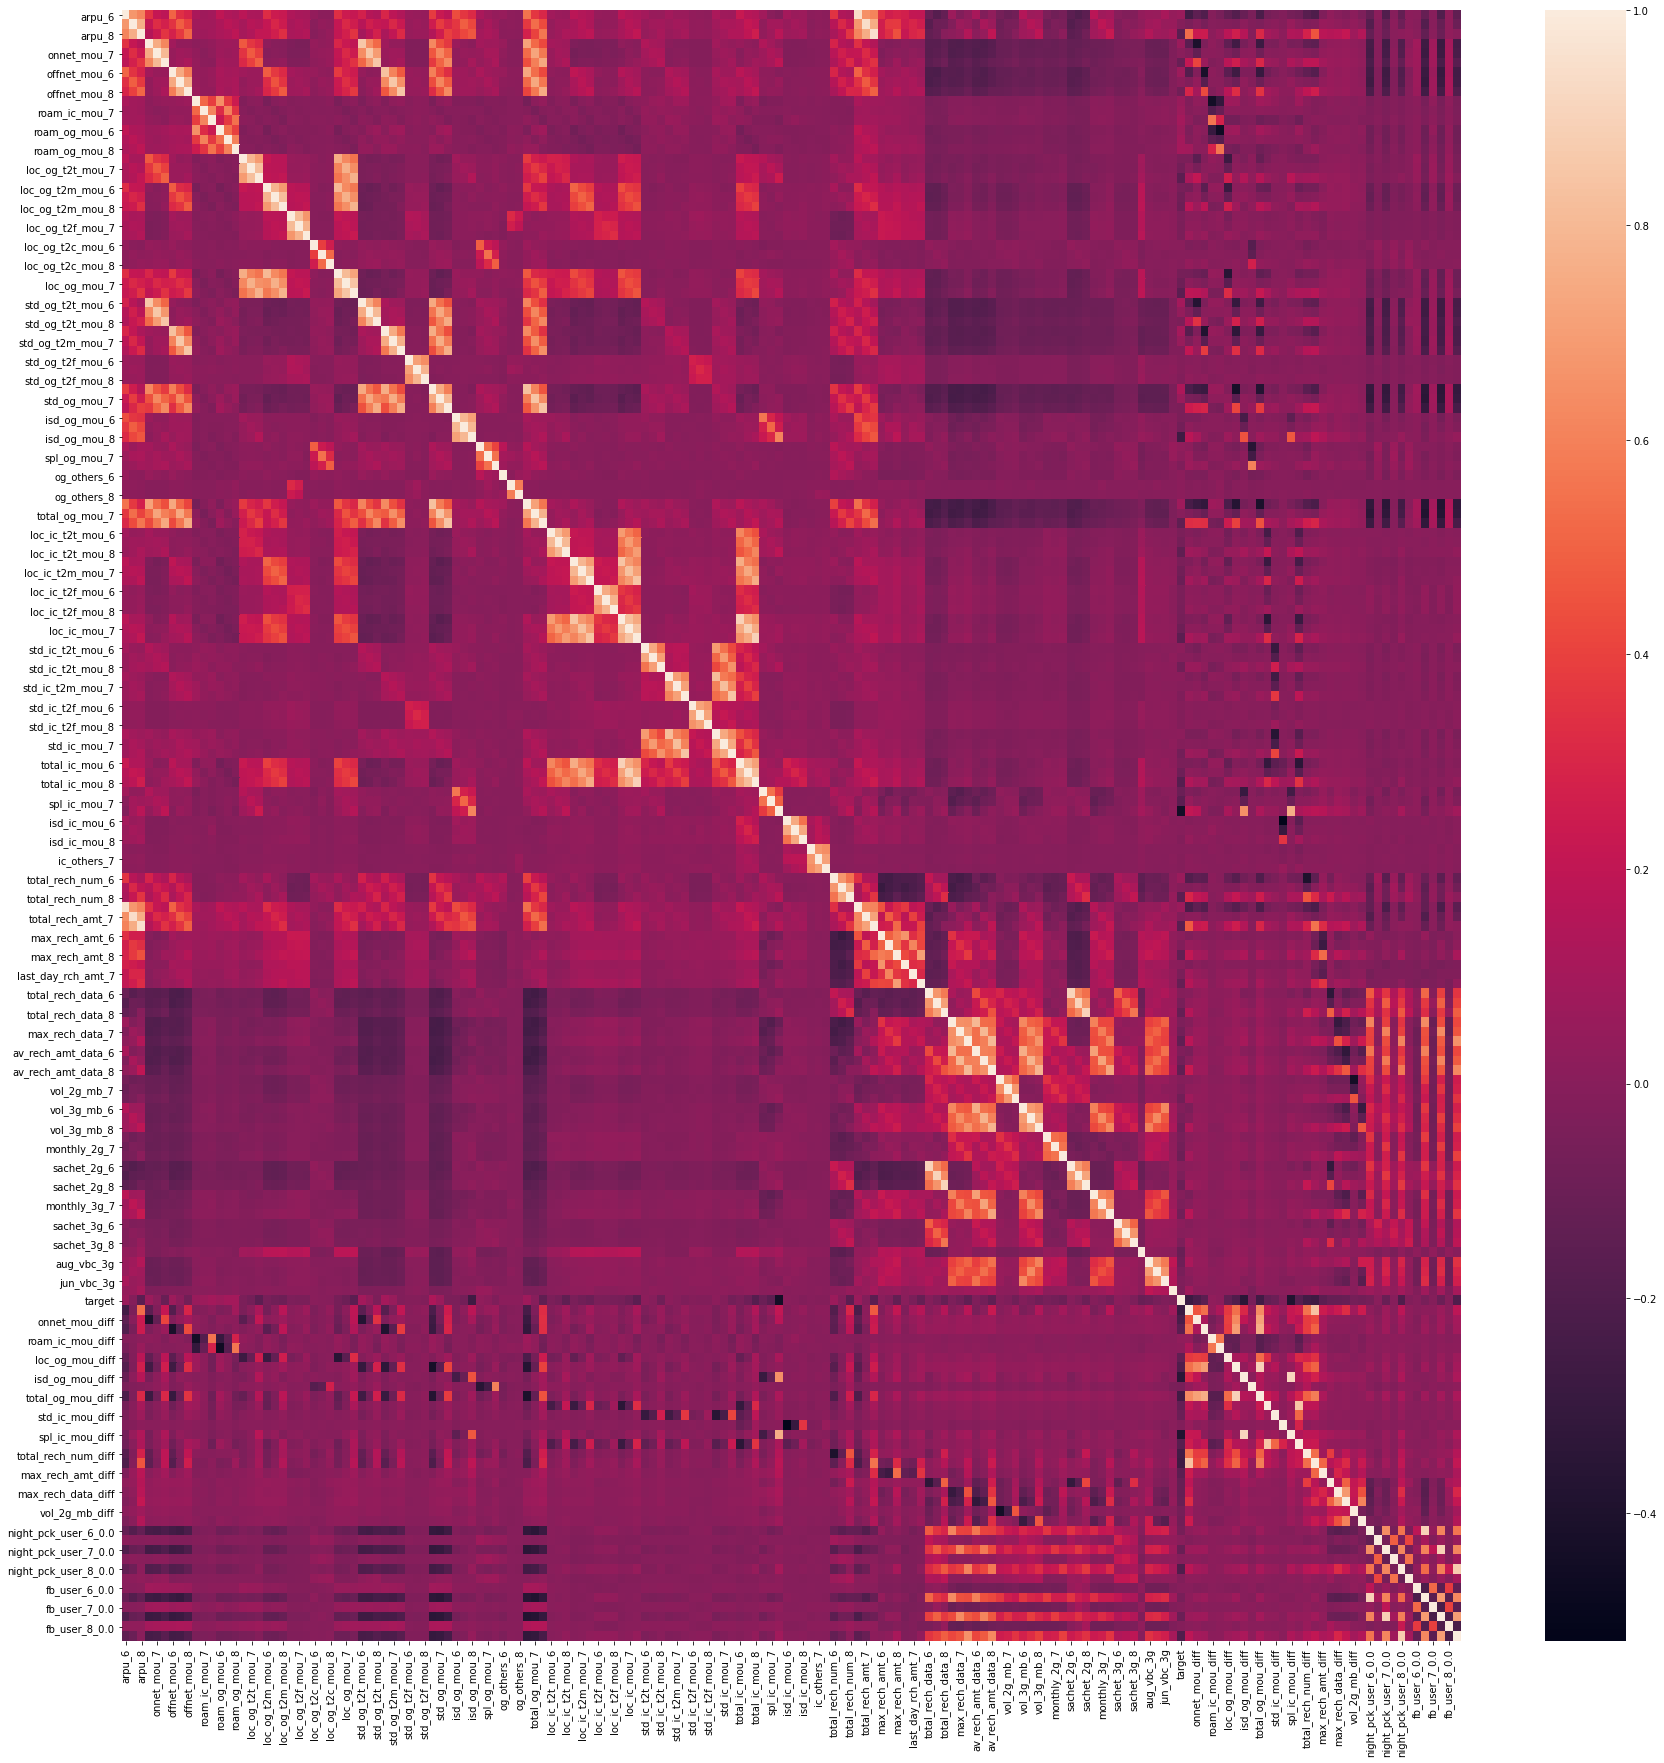

In [79]:
## checking correlations between numeric columns
plt.figure(figsize=(30,30))
sns.heatmap(telecom_hv1.corr())
plt.show()

- There are issues of multi-collinearity which will have to be addressed while building the models

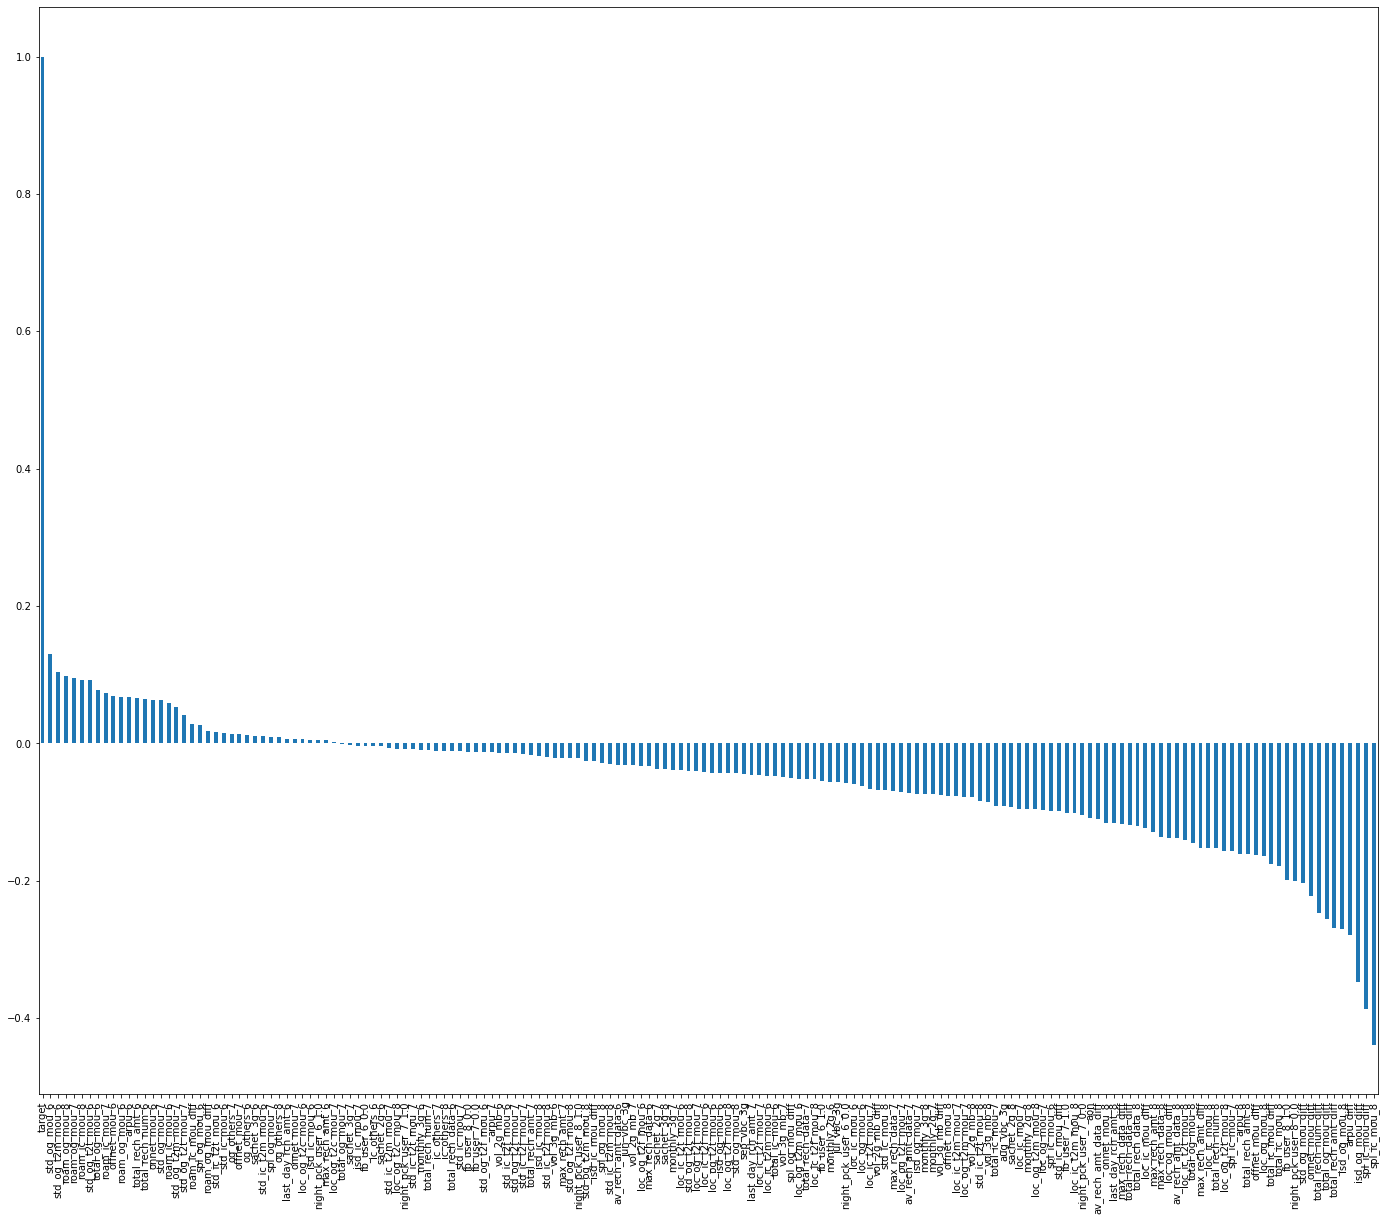

In [80]:
## correlation of 'target' with other variables
plt.figure(figsize=(24,20))
telecom_hv1.corr()['target'].sort_values(ascending = False).plot(kind='bar')
plt.show()

- Largely, the features associsted with the 'good phase' seem to be positively or least negatively associated with the target variable.

## IV. Data Preprocessing
Broad Objectives:
- Capping outliers
- Creating X and y lables
- Train Test Split
- Scaling

### Capping outliers

In [81]:
## looking at the spread of values
telecom_hv_num.describe(percentiles=[.02,.05,.10,.25,.50,.75,.90,.95,.98,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

- Removing the outliers is a tricky business here, as we actively chose the high valued customers and retaining them is paramount to the business need.
- We will proceed very cautiously and cap outliers below 1% and above 99% 

#### Approach
- We will be using basic technique of capping outliers below 1% and above 99%.

#### Standard Method

In [82]:
# removing (statistical) outliers
Q1 = telecom_hv_num.quantile(0.01)
Q3 = telecom_hv_num.quantile(0.99)
IQR = Q3 - Q1
telecom_hv_num1 = telecom_hv_num[(telecom_hv_num>= Q1 - 1.5*IQR) & (telecom_hv_num <= Q3 + 1.5*IQR)]

In [83]:
telecom_hv_num1.describe(percentiles=[.02,.05,.10,.25,.50,.75,.90,.95,.98,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29983.000000,29982.000000,29981.000000,29993.000000,29988.000000,29988.000000,29996.000000,29995.000000,29989.000000,29961.000000,29939.000000,29945.000000,29956.000000,29953.000000,29940.000000,29964.000000,29965.000000,29964.000000,29990.000000,29988.000000,29991.000000,29962.000000,29959.000000,29959.000000,29958.000000,29948.000000,29969.000000,29990.000000,29985.000000,29991.000000,29993.000000,29986.000000,29988.000000,29990.000000,29991.000000,29985.000000,29917.000000,29914.000000,29914.000000,29997.000000,29994.000000,29992.000000,29982.000000,29981.000000,29965.000000,29960.000000,29950.000000,29938.000000,29969.000000,29871.000000,29849.000000,29999.000000,29996.000000,29994.000000,29945.000000,29945.000000,29944.000000,29982.000000,29979.000000,29980.000000,29959.000000,29953.000000,29962.000000,29986.000000,29987.000000,29986.000000,29923.000000,29943.000000,29939.000000,29938.000000,29926.000000,29930.000000,29928.000000,29931.000000,29923.000000,29946.000000,29949.000000,29946.000000,29989.000000,29992.000000,29990.000000,30001.000000,30001.000000,30001.000000,29911.000000,29909.000000,29911.000000,29906.000000,29914.000000,29897.000000,29993.000000,29998.000000,29995.000000,29984.000000,29983.000000,29982.000000,29988.000000,29989.000000,29984.000000,29974.000000,29980.000000,29971.000000,29991.000000,29989.00000,29980.000000,29988.000000,29985.000000,29991.000000,29988.000000,29985.000000,29990.000000,29985.000000,29984.000000,29979.000000,29971.000000,29977.000000,29977.000000,29997.000000,29996.000000,29994.000000,29993.000000,29986.000000,29992.000000,29955.000000,29958.000000,29935.000000,30001.000000,29988.000000,29987.000000,29986.000000,2993

In [84]:
## cheking if any null values are created 
telecom_hv_num1.isnull().sum()

arpu_6                    18
arpu_7                    19
arpu_8                    20
onnet_mou_6                8
onnet_mou_7               13
onnet_mou_8               13
offnet_mou_6               5
offnet_mou_7               6
offnet_mou_8              12
roam_ic_mou_6             40
roam_ic_mou_7             62
roam_ic_mou_8             56
roam_og_mou_6             45
roam_og_mou_7             48
roam_og_mou_8             61
loc_og_t2t_mou_6          37
loc_og_t2t_mou_7          36
loc_og_t2t_mou_8          37
loc_og_t2m_mou_6          11
loc_og_t2m_mou_7          13
loc_og_t2m_mou_8          10
loc_og_t2f_mou_6          39
loc_og_t2f_mou_7          42
loc_og_t2f_mou_8          42
loc_og_t2c_mou_6          43
loc_og_t2c_mou_7          53
loc_og_t2c_mou_8          32
loc_og_mou_6              11
loc_og_mou_7              16
loc_og_mou_8              10
std_og_t2t_mou_6           8
std_og_t2t_mou_7          15
std_og_t2t_mou_8          13
std_og_t2m_mou_6          11
std_og_t2m_mou

In [85]:
## dropping the null values
telecom_hv_num1.dropna(inplace=True)

In [86]:
## cheking null values 
telecom_hv_num1.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

- Null values removed

In [87]:
## shape of dataset
telecom_hv_num1.shape

(27760, 154)

In [89]:
## creating telecom_ final
telecom_final = pd.concat([telecom_hv_num1,telecom_hv_cat],axis=1)
telecom_final.shape

(30001, 170)

In [90]:
## checking null values again
telecom_final.isnull().sum()

arpu_6                   2241
arpu_7                   2241
arpu_8                   2241
onnet_mou_6              2241
onnet_mou_7              2241
onnet_mou_8              2241
offnet_mou_6             2241
offnet_mou_7             2241
offnet_mou_8             2241
roam_ic_mou_6            2241
roam_ic_mou_7            2241
roam_ic_mou_8            2241
roam_og_mou_6            2241
roam_og_mou_7            2241
roam_og_mou_8            2241
loc_og_t2t_mou_6         2241
loc_og_t2t_mou_7         2241
loc_og_t2t_mou_8         2241
loc_og_t2m_mou_6         2241
loc_og_t2m_mou_7         2241
loc_og_t2m_mou_8         2241
loc_og_t2f_mou_6         2241
loc_og_t2f_mou_7         2241
loc_og_t2f_mou_8         2241
loc_og_t2c_mou_6         2241
loc_og_t2c_mou_7         2241
loc_og_t2c_mou_8         2241
loc_og_mou_6             2241
loc_og_mou_7             2241
loc_og_mou_8             2241
std_og_t2t_mou_6         2241
std_og_t2t_mou_7         2241
std_og_t2t_mou_8         2241
std_og_t2m

In [91]:
## again dropping null values
telecom_final.dropna(inplace=True)

In [92]:
## checking shape
telecom_final.shape

(27760, 170)

### Creating X and y labels

In [93]:
## y label
y = telecom_final['target']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [94]:
## X label
X = telecom_final.drop('target',axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,fb_user_8_1.0,fb_user_7_1.0,fb_user_7_0.0,fb_user_6_1.0,fb_user_6_0.0,night_pck_user_8_1.0,night_pck_user_8_0.0,night_pck_user_7_1.0,night_pck_user_7_0.0,night_pck_user_6_1.0,night_pck_user_6_0.0,fb_user_8_0.0,monthly_2g_6,monthly_2g_8,monthly_2g_7
0,197.385,214.816,213.803,-219.40905,-198.485939,0.00,288.383848,284.301243,0.00,33.694507,13.250245,0.00,30.215415,11.154199,0.00,-192.019269,-235.939105,0.00,166.259313,165.972199,0.00,6.455171,6.538511,0.00,2.753958,-0.270008,0.00,-19.376708,-63.394507,0.00,60.809299,65.222869,0.00,182.746647,191.340458,0.00,1.837694,1.849486,0.00,245.374353,258.432415,0.00,-232.470025,-202.346535,0.00,5.921036,7.236029,0.00,0.668464,0.081944,0.0,0.00,0.00,0.00,-79.343073,-91.724669,0.16,153.193461,154.386209,4.13,15.56164,16.329808,1.15,89.366446,78.967762,5.44,-39.892599,-40.216879,0.00,29.735181,31.384525,0.00,2.745235,2.84766,0.00,-7.426147,-5.9984,0.00,0.00,0.00,5.44,-92.952779,-85.26947,0.0,10.569836,10.976606,0.00,1.173041,1.526773,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,7.7025,208.947495,-286.342546,-23.472376,-20.684807,41.385608,-251.903384,217.40828,-6.578532,0.000,-78.727104,6.712273,-10.773221,89.111125,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,1,1,0,1,0,0,1,0,1,0,1,0,0.0,0.0,0.0
1,1069.180,1349.850,3171.480,57.84000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.3

### Test-Train-Split

In [95]:
## importing libraries
from sklearn.model_selection import train_test_split

In [96]:
## splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,stratify=y,random_state=100)

In [97]:
## checking shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22208, 169)
(22208,)
(5552, 169)
(5552,)


In [98]:
## checking if train and test sets are stratified
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.08127701729106629
0.08123198847262247


- Same ratios in both, samples are stratified

### Scaling
- Scaling will be done only on the numeric columns

In [99]:
## importing libaries
from sklearn.preprocessing import StandardScaler

In [100]:
## instantiating scaling object
scaler = StandardScaler()

In [101]:
X_train[num_cols].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
8773,814.387,1215.804,902.830,308.46,217.740000,157.560000,657.19,1335.760000,666.390000,0.0,15.780000,90.980000,0.0,60.930000,216.660000,306.76,175.190000,123.710000,327.44,1161.810000,311.580000,58.84,50.090000,36.860000,0.00,0.000000,0.000000,693.06,1387.110000,472.160000,1.70,17.130000,4.530000,270.89,88.330000,130.590000,0.00,0.000000,0.000000,272.59,105.460000,135.130000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,965.66,1492.58,607.29,51.69,123.640000,59.590000,241.14,240.980000,220.480000,55.39,50.410000,33.810000,348.24,415.040000,313.890000,7.84,22.290000,0.910000,17.54,27.530000,0.400000,0.0,0.00000,0.000000,25.39,49.830000,1.310000,376.21,465.16,315.21,0.0,0.000000,0.000000,0.00,0.000000,0.000000,2.56,0.280000,0.000000,5.0,6.0,6.0,952.0,1462.0,904.0,279.0,279.0,250.0,279.0,250.0,0.0,1.0,1.0,1.0,154.0,154.0,154.0,154.0,154.0,154.0,5.40,7.83,147.35,194.98,384.20,650.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.0,410.91,103.69,82.08,0.0,-112.2655,-105.540000,-330.08500,83.0900,186.195000,-567.925000,-53.895000,0.000000,0.000000,-621.830,-67.750000,-36.300000,0.000000,0.000000,-105.475,0.5,-303.0,-29.0,0.0,0.0,0.0,140.735,360.990
16546,851.400,1576.277,1254.609,360.61,507.940000,390.180000,168.34,257.510000,292.840000,0.0,0.000000,22.180000,0.0,0.000000,74.410000,32.89,63.110000,37.890000,145.59,149.840000,194.180000,0.35,21.230000,0.000000,0.00,0.000000,0.000000,178.84,234.190000,232.080000,327.71,444.830000,309.710000,20.11,32.990000,49.260000,0.00,22.980000,1.800000,347.83,500.810000,360.780000,2.28,30.440000,15.740000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,528.96,765.46,608.61,31.14,43.540000,30.310000,94.34,127.930000,95.930000,

In [102]:
## Scaling X_train i.e fit_transform on X_train[num_cols]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) 

In [103]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,fb_user_8_1.0,fb_user_7_1.0,fb_user_7_0.0,fb_user_6_1.0,fb_user_6_0.0,night_pck_user_8_1.0,night_pck_user_8_0.0,night_pck_user_7_1.0,night_pck_user_7_0.0,night_pck_user_6_1.0,night_pck_user_6_0.0,fb_user_8_0.0,monthly_2g_6,monthly_2g_8,monthly_2g_7
8773,0.784758,1.949112,1.132990,0.143392,-0.081094,-0.136729,0.650656,2.118220,0.792271,-0.255258,0.161171,1.891126,-0.261706,0.659767,3.072651,1.295182,0.547169,0.355346,0.711430,4.447193,0.725820,3.544849,3.034546,2.295562,-0.316337,-0.311481,-0.319891,1.361515,3.490647,0.795280,-0.426687,-0.393534,-0.383420,0.234455,-0.242946,-0.073393,-0.213430,-0.212259,-0.213663,-0.130244,-0.426889,-0.305720,0.094252,0.090382,0.170632,-0.441461,-0.484127,-0.474449,-0.354063,-0.138256,-0.205384,0.584878,1.350268,0.126017,-0.050632,0.592227,0.065392,0.477463,0.481442,0.391516,1.259799,1.071405,0.646337,0.492155,0.753306,0.396629,-0.072037,0.349266,-0.230370,-0.120366,0.039522,-0.417429,-0.249474,-0.251542,-0.259653,-0.149048,0.158930,-0.446031,0.402437,0.709340,0.230087,0.133083,0.135552,0.203040,-0.218252,-0.230858,-0.228925,0.694318,-0.148716,-0.234916,-0.751183,-0.614957,-0.427324,0.754727,1.939438,0.787059,0.784749,0.737430,0.686686,1.530195,1.266134,-0.743088,-0.241514,-0.285314,-0.210472,0.728355,0.705435,0.797424,0.157435,0.104056,0.209073,-0.390787,-0.373496,0.167526,-0.170539,0.059848,0.453302,-0.437269,-0.457397,-0.428002,-0.361139,-0.362904,-0.349239,-0.257938,-0.251999,-0.227503,-0.763801,0.645909,-0.165704,-0.179986,-0.187624,-0.198218,-0.240901,-0.937525,1.893191,2.688903,-2.924105,-0.013472,0.100789,-0.011296,-1.186918,-0.403758,-0.609642,0.012014,0.114685,-0.543389,0.369023,-0.617973,-0.151084,0.081123,0.087835,0.097828,0.6

In [105]:
## scaling X_test i.e transform on (X_test[num_cols]
X_test[num_cols]= scaler.transform(X_test[num_cols])
X_test.shape

(5552, 169)

In [359]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,fb_user_8_1.0,fb_user_7_1.0,fb_user_7_0.0,fb_user_6_1.0,fb_user_6_0.0,night_pck_user_8_1.0,night_pck_user_8_0.0,night_pck_user_7_1.0,night_pck_user_7_0.0,night_pck_user_6_1.0,night_pck_user_6_0.0,fb_user_8_0.0,monthly_2g_6,monthly_2g_8,monthly_2g_7
25583,-0.551864,-0.849237,-0.305831,-0.385938,-0.460823,-0.234939,-0.254011,-0.752826,-0.707885,-0.255258,-0.217836,-0.240049,-0.261706,-0.233661,-0.255257,-0.090197,-0.153331,-0.226567,-0.533005,-0.662876,-0.635467,-0.374123,-0.384749,-0.384702,-0.316337,-0.311481,-0.177917,-0.438691,-0.557885,-0.578877,-0.363423,-0.417555,-0.144437,0.087162,-0.432198,-0.402126,-0.213430,-0.212259,-0.213663,-0.186784,-0.570592,-0.361217,0.098101,0.090382,0.170632,-0.441461,-0.484127,-0.417327,-0.354063,-0.138256,-0.205384,-0.400625,-0.805724,-0.606044,1.086750,0.102699,0.201391,-0.280964,-0.254991,-0.268275,-0.412711,-0.271156,-0.392261,0.200785,-0.180033,-0.157888,0.184764,0.405518,-0.045977,0.359052,0.150760,0.838636,-0.249474,-0.251542,-0.259653,0.334178,0.270387,0.588873,0.407405,0.054705,0.095428,0.133083,0.135552,0.20304,1.230325,1.296560,0.743698,-0.225753,-0.223957,-0.234916,0.037769,0.053983,1.735679,-0.634864,-0.863155,-0.273274,-0.799125,-0.782841,-0.862704,-0.439661,-0.589419,-0.489906,0.521924,0.772316,2.051945,-0.483004,-0.496319,-0.437108,-0.289763,-0.189646,0.282418,0.516420,0.136246,0.287376,-0.447384,-0.464910,-0.441293,0.785865,1.044192,2.436696,-0.361139,-0.362904,-0.349239,-0.257938,-0.251999,-0.227503,1.822456,-0.417509,-0.421261,-0.397464,-0.187624,0.455650,0.296519,-0.233993,0.022875,0.037732,-0.094902,0.058959,0.098810,0.047390,0.020368,-0.291632,0.372322,-0.779236,0.114685,-0.228215,2.343079,0.545051,-0.023107,1.8249

- Now that we have cleaned and scaled dataset we can move ahead to model making.
- But since there are too many variables, let's first try PCA before model building.

## V. PCA

In [106]:
## importing libraries
from sklearn.decomposition import PCA

In [107]:
## instantiating pca object
pca = PCA(random_state=42)
## fitting into PCA
pca.fit(X_train)

PCA(random_state=42)

In [108]:
## pca components
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(60))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.106178,0.106178
1,0.191535,0.085357
2,0.250954,0.059419
3,0.303782,0.052828
4,0.342700,0.038917
5,0.377853,0.035153
6,0.410781,0.032928
7,0.437821,0.027040
8,0.463123,0.025302
9,0.485237,0.022114


- 51 variables explain 90% variance!

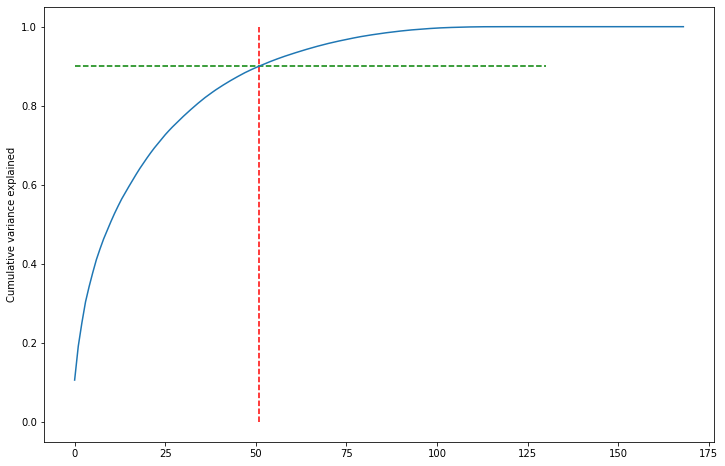

In [109]:
## visualising through Skree Plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=51, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(cvr)
plt.ylabel("Cumulative variance explained")
plt.show()

## VI. Model Building 1
- In the model, '1' would represent churn and '0' would represent no-churn.
- Here, we intend to build a model with a high success rate of detecting 1's i.e the customers who are likely to churn.
- The purpose of this model will be to purely identify who among the existing high-valued customers are likely to churn, so that corrective actions could be taken to prevent them from churning such as offering them special schemes.


**Approach to Model Building**
- Using the 51 features obtained from PCA which describe 90% varaince in the model, we will run incremental PCA to generate new train and test datasets from the orignal X_train and X_test.
- These new and PCA-transformed features will be used to train Random Forest classifier models.
- Since there is high class imbalance among the target variable, we will use different approaches to address this class-imbalance. The approaches that we will explore are:
       - Assigning weights to classes to nullify class-imbalance
       - Over-sampling
       - Under-Sampling
       - Hybrid-Samling
- Whichever technique gives us the best recall score, and good AUC and matthews coefficient, that model will be our final model.

**Metrics to Use for Model Evaluation**
- Since this is a highly imbalanced dataset, accuracy cannot be a good measure to gauge the model's performance.
- The most important metric that we will focus on is 'Recall score' of the model, i.e. out of the actual 1's, how many 1's can the model rightly predict.
- So in terms of precision-recall trade-off, our focus will be more on recall since predicting a 0 as 1 won't hurt the business, in-fact that may even strenghten the loyalty among existing customer base by providing them new offers, but misclassifying a 1 as 0 would be very detrimental to the business.
- Other metrics that we will use are:
       - roc-auc: for optimizing grid-search
       - auc from roc curve to see the overall model fit
       - Matthews coefficient to determine the overall model performance.

### Let's go ahead with 90% variance and build Incremental PCA with 51 features
- This will give us the transformed X_train and X_test sets with reduced dimensionality
- These new df_train_pca and df_test_pca will be used to train and test the random forest classifiers.

In [110]:
## importing libraries
from sklearn.decomposition import IncrementalPCA

In [111]:
## instantiating PCA object
pca51 = IncrementalPCA(n_components=51)

In [112]:
## fitting into pca50
## getting new X_train i.e df_train_pca having only the pca variables explaining 90% variance
df_train_pca = pca51.fit_transform(X_train)
df_train_pca.shape

(22208, 51)

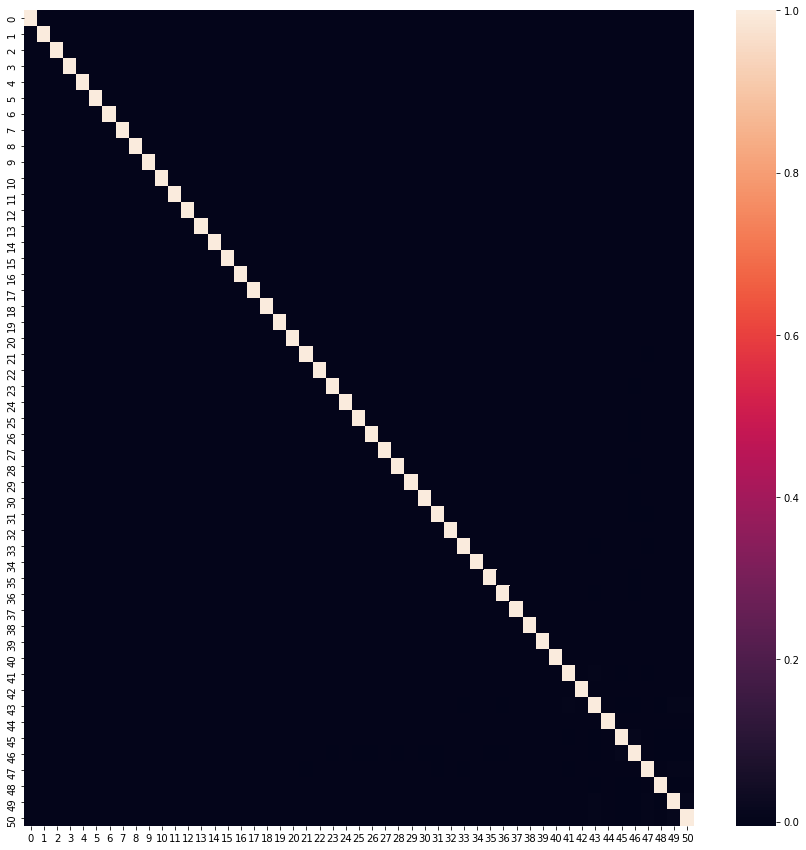

In [113]:
## checking correlations
plt.figure(figsize=[15,15])
corrmat = np.corrcoef(df_train_pca.transpose())
sns.heatmap(corrmat)
plt.show()

- Except for diagonal, all correlations are zero or very-very close to zero

### Applyting the transformation on the test set

In [114]:
df_test_pca = pca51.transform(X_test)
df_test_pca.shape

(5552, 51)

### Random Forest Model with class weights after PCA

In [115]:
## importing libraries
from sklearn.ensemble import RandomForestClassifier

In [116]:
## instantiating vanilla RandomForestClassifier
## assigning class weights
rf = RandomForestClassifier(random_state=42,oob_score=True,class_weight={0:0.1, 1: 0.9},
                           n_jobs= -1)

In [117]:
## Fitting into rf
rf.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1, oob_score=True,
                       random_state=42)

In [118]:
## checking oob score
rf.oob_score_

0.937274855907781

#### plotting roc_curve

In [119]:
## importing libraries
from sklearn.metrics import roc_curve,plot_roc_curve

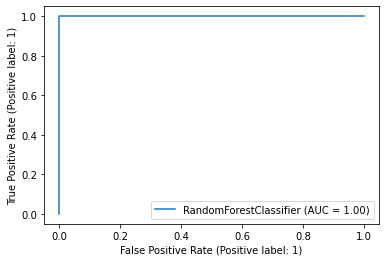

In [120]:
## roc-curve
plot_roc_curve(rf,df_train_pca, y_train)
plt.show()

- This is a clear case of overfitting.
- Let's go for hyperparameter tuning

## Hyperparameter Tuning
- We will go for grid search

In [121]:
### importing libraries
from sklearn.model_selection import GridSearchCV

In [122]:
## defining parameter grid
params = {
    'max_depth': [9,10,11,12,13],
    'max_features':['log2'],
    'min_samples_split': [1,2,3,5],
    'n_estimators': [20,40,50,70,90],
    'bootstrap':[True]
}

In [123]:
## defining grid-search
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring = 'roc_auc',
                           verbose=1, n_jobs=-1)

In [124]:
## running grid-search
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [9, 10, 11, 12, 13],
                         'max_features': ['log2'],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [20, 40, 50, 70, 90]},
             scoring='roc_auc', verbose=1)

In [125]:
## besdt score after grid-search
grid_search.best_score_

0.8955672704455221

In [126]:
## getting best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=9,
                       max_features='log2', min_samples_split=5,
                       n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

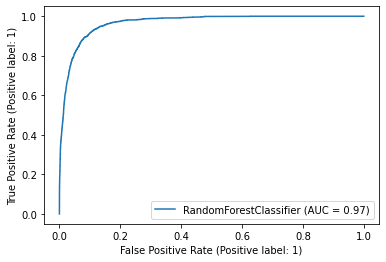

In [127]:
## roc-curve for train set
plot_roc_curve(rf_best,df_train_pca, y_train)
plt.show()

In [128]:
## predictions
y_train_pred = rf_best.predict(df_train_pca)
y_test_pred = rf_best.predict(df_test_pca)

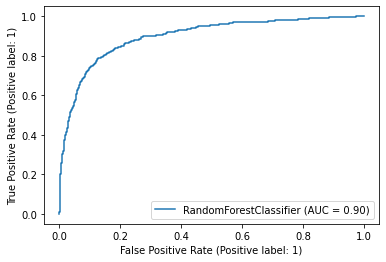

In [129]:
## roc-curve for test set
plot_roc_curve(rf_best,df_test_pca, y_test)
plt.show()

####  Checking important metrics

In [130]:
## importing libraries
from sklearn.metrics import classification_report,plot_confusion_matrix,matthews_corrcoef

In [131]:
## getting classification report on train-set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     20403
           1       0.61      0.79      0.69      1805

    accuracy                           0.94     22208
   macro avg       0.79      0.87      0.83     22208
weighted avg       0.95      0.94      0.94     22208



In [132]:
## getting classification report on test-set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5101
           1       0.49      0.59      0.54       451

    accuracy                           0.92      5552
   macro avg       0.73      0.77      0.75      5552
weighted avg       0.93      0.92      0.92      5552



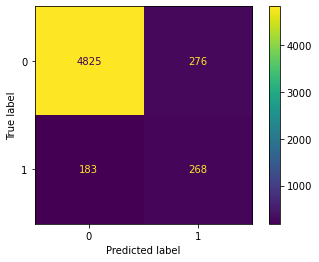

In [133]:
## plotting confusion matrix fro test-set
plot_confusion_matrix(rf_best,df_test_pca,y_test)
plt.show()

In [517]:
## matthews coefficient for test-set
matthews_corrcoef(y_test,y_test_pred)

0.4963419819737717

- For Random Forest Classifier with assinged weights, we get the following on the test set:
   - Recall of 59%
   - matthews_corrcoef of .496
   - AUC of .90
- Let's try oversampling to see if we can get better Recall.

### Using Oversampling

In [135]:
## importing libraries
from imblearn.over_sampling import RandomOverSampler

In [136]:
## instatiating oversampling  object to make the ratio between imbalanced classes as 1:1
oversample = RandomOverSampler(sampling_strategy='minority')

In [137]:
## creating new X_train and y_train
X_train_sampled,y_train_sampled = oversample.fit_resample(df_train_pca,y_train)

In [138]:
## shape of oversampled X_train
X_train_sampled.shape

(40806, 51)

In [139]:
## shape of oversampled y_train
y_train_sampled.shape

(40806,)

In [140]:
## checking 1's
y_train_sampled.sum()

20403

- The sum is 20403 i.e 40806/2, hence the ratio of 0 and 1 is now 1:1

In [141]:
## instatiating vanilla random forest
rf_sample = RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)

In [142]:
## fitting train values
rf_sample.fit(X_train_sampled,y_train_sampled)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [143]:
## oob score
rf_sample.oob_score_

0.9924520903788658

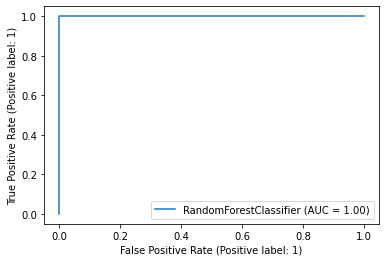

In [277]:
## plotting roc-curve
plot_roc_curve(rf,df_train_pca, y_train)
plt.show()

- Overfiting! Let's go for hyperparameter tuning

In [144]:
## defining parameters
params = {
    'max_depth': [7,9,11],
    'min_samples_split': [1,2,3,5],
    'n_estimators': [70,90,100,110]
}

In [145]:
## defining grid search
grid_search = GridSearchCV(estimator=rf_sample,param_grid=params,cv=5,scoring = 'roc_auc',
                           verbose=1, n_jobs=-1)

In [146]:
## fitting into grid search
grid_search.fit(X_train_sampled, y_train_sampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9, 11],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [70, 90, 100, 110]},
             scoring='roc_auc', verbose=1)

In [147]:
## best estimator
rf_sample_best = grid_search.best_estimator_
rf_sample_best

RandomForestClassifier(max_depth=11, n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

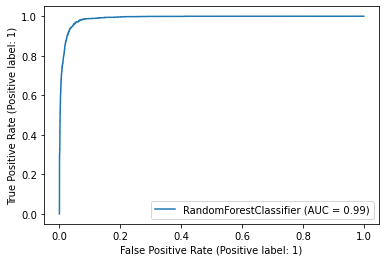

In [148]:
## roc-curve of train_set
plot_roc_curve(rf_sample_best,X_train_sampled, y_train_sampled)
plt.show()

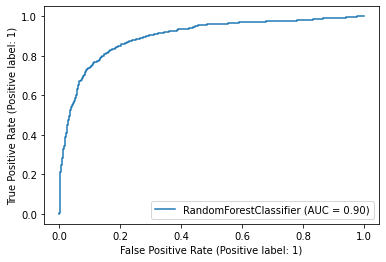

In [149]:
## roc_curve of test-set
plot_roc_curve(rf_sample_best,df_test_pca, y_test)
plt.show()

In [150]:
## smaple prediction
y_sample_pred = rf_sample_best.predict(df_test_pca)

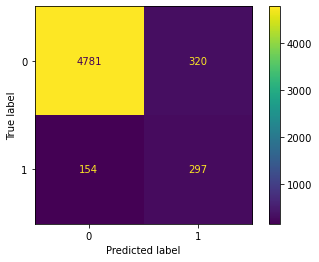

In [151]:
## plotting confusion matrix
plot_confusion_matrix(rf_sample_best,df_test_pca,y_test)
plt.show()

In [152]:
print(classification_report(y_test,y_sample_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5101
           1       0.48      0.66      0.56       451

    accuracy                           0.91      5552
   macro avg       0.73      0.80      0.75      5552
weighted avg       0.93      0.91      0.92      5552



In [154]:
## matthews coefficient for test-set
matthews_corrcoef(y_test,y_sample_pred)

0.5178846420503651

- For Random Forest Classifier with oversampling, we get the following on the test set:
   - Recall of 66% for 1
   - matthews_corrcoef of .518
   - AUC of .90
- Let's try running some iterations on oversampling to see if we can get better Recall.

### Running different iterations for oversampled data

In [155]:
## running RandomForestClassifier wiht max_depth=7 as opposed to 11 as returned by grid search
rf_test = RandomForestClassifier(n_estimators=120,max_depth=7,n_jobs=-1,oob_score=True)

In [156]:
## fitting into model
rf_test.fit(X_train_sampled,y_train_sampled)

RandomForestClassifier(max_depth=7, n_estimators=120, n_jobs=-1, oob_score=True)

In [157]:
## test predictions
rf_predict_test = rf_test.predict(df_test_pca)

In [158]:
print(classification_report(y_test,rf_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5101
           1       0.41      0.73      0.52       451

    accuracy                           0.89      5552
   macro avg       0.69      0.82      0.73      5552
weighted avg       0.93      0.89      0.91      5552



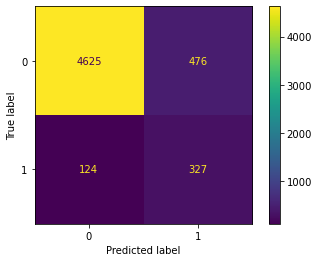

In [359]:
plot_confusion_matrix(rf_test,df_test_pca,y_test)
plt.show()

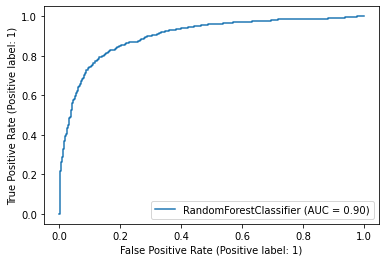

In [159]:
plot_roc_curve(rf_test,df_test_pca,y_test )
plt.show()

In [160]:
matthews_corrcoef(y_test,rf_predict_test)

0.4934537891746279

- By pruning the depth of the RandomForestClassifier to 7, we weree able to get better recall of 73% for 1
- Other metrics remained more or less the same
- Let's try undersampling now.

### Trying Undersampling

In [161]:
## importing libraries
from imblearn.under_sampling import RandomUnderSampler

In [162]:
## instantiating undersampling object
undersample = RandomUnderSampler()


In [163]:
## fitting 
X_train_under,y_train_under = undersample.fit_resample(df_train_pca,y_train)
print(X_train_under.shape)
print(y_train_under.shape)

(3610, 51)
(3610,)


In [164]:
## checking class imbalance
y_train.sum()

1805

0's and 1's balanced.

In [165]:
## instatiating vanilla random forest
rf_under = RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)

In [166]:
## fitting train values
rf_under.fit(X_train_under,y_train_under)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

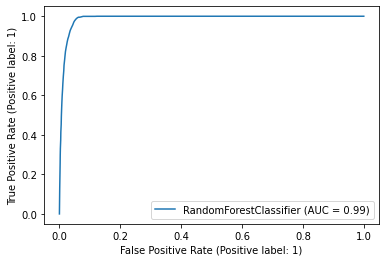

In [167]:
## roc- curve for train set
plot_roc_curve(rf_under,df_train_pca, y_train)
plt.show()

- Somewhat overfitting.
- Let's go for hyperparameter tuning

#### Hyperparameter Tuning

In [168]:
## defining parameters
params = {
    'max_depth': [5,7,9,11],
    'min_samples_split': [1,2,3,5],
    'n_estimators': [70,90,100,110]
}

In [169]:
## defining grid search
grid_search = GridSearchCV(estimator=rf_under,param_grid=params,cv=5,scoring = 'roc_auc',
                           verbose=1, n_jobs=-1)

In [170]:
## running grid-search
grid_search.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [70, 90, 100, 110]},
             scoring='roc_auc', verbose=1)

In [171]:
## best estimator
best_under = grid_search.best_estimator_
best_under

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=110,
                       n_jobs=-1, oob_score=True, random_state=42)

In [172]:
## predictions for test set
y_under_pred = best_under.predict(df_test_pca)

In [173]:
## classification report for test-set
print(classification_report(y_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5101
           1       0.36      0.78      0.49       451

    accuracy                           0.87      5552
   macro avg       0.67      0.83      0.71      5552
weighted avg       0.93      0.87      0.89      5552



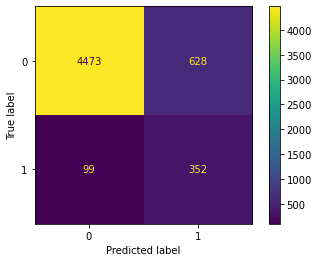

In [174]:
## confusion matrix for test-set
plot_confusion_matrix(best_under,df_test_pca,y_test)
plt.show()

In [175]:
## matthews coefficient for test set
matthews_corrcoef(y_test,y_under_pred)

0.47104539549226565

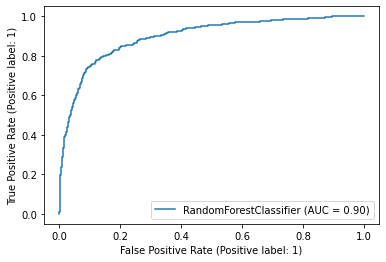

In [338]:
## roc-curve for test-set
plot_roc_curve(best_under,df_test_pca, y_test)
plt.show()

- For Random Forest Classifier with undersampling, we get the following on the test set:
   - Recall of 78% for 1
   - matthews_corrcoef of .471
   - AUC of .90
- Let's try Hybrid-approach to see if we can get better results.

### Hybrid Model using both under-sampling and over-sampling

In [177]:
# defining oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X_train_hybrid,y_train_hybrid = over.fit_resample(df_train_pca,y_train)
# defining undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_train_hybrid,y_train_hybrid = under.fit_resample(X_train_hybrid,y_train_hybrid)

In [178]:
# vanilla random forest classifier
rf_hybrid = RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)

In [179]:
## fitting 
rf_hybrid.fit(X_train_hybrid,y_train_hybrid)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

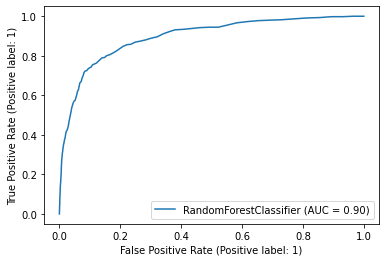

In [180]:
## roc-curve on test set
plot_roc_curve(rf_hybrid,df_test_pca, y_test)
plt.show()

In [181]:
## classification report for test set
print(classification_report(y_test,rf_hybrid.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5101
           1       0.47      0.65      0.54       451

    accuracy                           0.91      5552
   macro avg       0.72      0.79      0.75      5552
weighted avg       0.93      0.91      0.92      5552



### Hyper parameter tuning

In [518]:
## defining parameters
params = {
    'max_depth': [9,11,13,15],
    'min_samples_split': [1,2,3,5],
    'n_estimators': [100,110,120,130]
}

In [519]:
## defining grid search

grid_search = GridSearchCV(estimator=rf_under,param_grid=params,cv=5,scoring = 'roc_auc',
                           verbose=1, n_jobs=-1)

In [520]:
## running grid search
grid_search.fit(X_train_hybrid,y_train_hybrid)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9, 11, 13, 15],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [100, 110, 120, 130]},
             scoring='roc_auc', verbose=1)

In [521]:
## finding best estimator
best_hybrid = grid_search.best_estimator_
best_hybrid

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=130,
                       n_jobs=-1, oob_score=True, random_state=42)

In [522]:
## calssification report
print(classification_report(y_test,best_hybrid.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5101
           1       0.48      0.66      0.56       451

    accuracy                           0.91      5552
   macro avg       0.72      0.80      0.75      5552
weighted avg       0.93      0.91      0.92      5552



- For Random Forest Classifier with hybrid-sampling, we get the following on the test set:
   - Recall of 66%

### Conclusion

- Among the models, the random forest model with undersampling is providing the best recall value of 78% for detecting 1's i.e the churn.
- The varaious parameters for the model as shown as under:

In [187]:
print(classification_report(y_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5101
           1       0.36      0.78      0.49       451

    accuracy                           0.87      5552
   macro avg       0.67      0.83      0.71      5552
weighted avg       0.93      0.87      0.89      5552



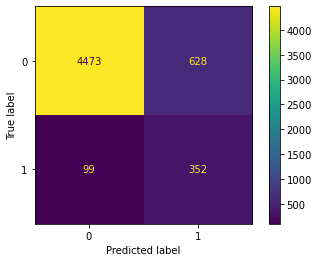

In [188]:
plot_confusion_matrix(best_under,df_test_pca,y_test)
plt.show()

### Creating DataFrame to display results

In [343]:
## getting best-prediction probabilities for 1 on test-set
best_under.predict_proba(df_test_pca)[:,1]

array([0.15279234, 0.81035993, 0.25568006, ..., 0.14296791, 0.21757088,
       0.30557635])

In [344]:
## label predictions on test-set
best_under.predict(df_test_pca)

array([0, 1, 0, ..., 0, 0, 0])

In [345]:
## getting best-prediction probabilities for 1 on train-set
best_under.predict_proba(df_train_pca)[:,1]

array([0.3443951 , 0.22708558, 0.86059254, ..., 0.39381543, 0.79065952,
       0.30610675])

In [549]:
## creating dataframe
y_train_pred_under = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':best_under.predict_proba(df_train_pca)[:,1]})
y_train_pred_under.head()

,Churn,Churn_Prob
0,0,0.344395
1,0,0.227086
2,0,0.860593
3,0,0.122216
4,0,0.586780


In [550]:
## adding predicted column with predicted lables 
y_train_pred_under['predicted'] = best_under.predict(df_train_pca)
y_train_pred_under.head()

,Churn,Churn_Prob,predicted
0,0,0.344395,0
1,0,0.227086,0
2,0,0.860593,1
3,0,0.122216,0
4,0,0.586780,1


In [552]:
## setiing index to  index of y_test so that we can map corresponding mobile numbers
y_train_pred_under = y_train_pred_under.set_index(y_train.index)
y_train_pred_under.head()

,Churn,Churn_Prob,predicted
8773,0,0.344395,0
16546,0,0.227086,0
20717,0,0.860593,1
17888,0,0.122216,0
24019,0,0.586780,1


In [553]:
## mapping mobile numbers from the origanl dataframe to indexes corresponding to y_train
y_train_pred_under['mobile_number'] = telecom.iloc[y_train.index]['mobile_number']
y_train_pred_under.head()

,Churn,Churn_Prob,predicted,mobile_number
8773,0,0.344395,0,7002013873
16546,0,0.227086,0,7001401447
20717,0,0.860593,1,7001029680
17888,0,0.122216,0,7000303702
24019,0,0.586780,1,7000843956


### Finding Optimal Cutoff Point


In [664]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_under[i]= y_train_pred_under.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_under.head()

,Churn,Churn_Prob,predicted,mobile_number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8773,0,0.344395,0,7002013873,1,1,1,1,0,0,0,0,0,0
16546,0,0.227086,0,7001401447,1,1,1,0,0,0,0,0,0,0
20717,0,0.860593,1,7001029680,1,1,1,1,1,1,1,1,1,0
17888,0,0.122216,0,7000303702,1,1,0,0,0,0,0,0,0,0
24019,0,0.586780,1,7000843956,1,1,1,1,1,1,0,0,0,0


In [665]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_under.Churn, y_train_pred_under[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081277  1.000000  0.000000
0.1   0.1  0.109510  1.000000  0.030731
0.2   0.2  0.433988  0.995014  0.384355
0.3   0.3  0.670074  0.981163  0.642553
0.4   0.4  0.810699  0.940166  0.799245
0.5   0.5  0.878377  0.891413  0.877224
0.6   0.6  0.919804  0.823269  0.928344
0.7   0.7  0.937590  0.709141  0.957800
0.8   0.8  0.945965  0.567867  0.979415
0.9   0.9  0.941372  0.336288  0.994903


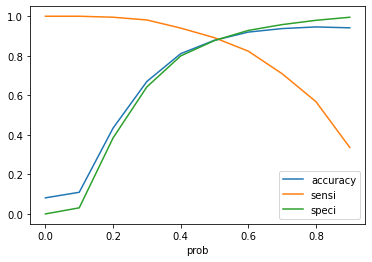

In [666]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [667]:
matthews_corrcoef(y_test,y_under_pred)

0.47104539549226565

- Even the optimal cut-off is close to 0.5, which is also the default cut-off value taken by our classifier model.
- So the model with undersampling; 'best_under', is the best model as per our analysis.

#### Dataframe for predictions on test-set

In [669]:
## creating dataframe
y_test_pred_under = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':best_under.predict_proba(df_test_pca)[:,1]})
y_test_pred_under.head()

,Churn,Churn_Prob
0,0,0.152792
1,0,0.810360
2,0,0.255680
3,0,0.073898
4,0,0.340910


In [670]:
## adding 'predicted column'
y_test_pred_under['predicted'] = best_under.predict(df_test_pca)
y_test_pred_under.head()

,Churn,Churn_Prob,predicted
0,0,0.152792,0
1,0,0.810360,1
2,0,0.255680,0
3,0,0.073898,0
4,0,0.340910,0


In [671]:
## setting index to  index of y_test so that we can map corresponding mobile numbers
y_test_pred_under = y_test_pred_under.set_index(y_test.index)
y_test_pred_under.head()

,Churn,Churn_Prob,predicted
25583,0,0.152792,0
997,0,0.810360,1
23572,0,0.255680,0
1074,0,0.073898,0
12761,0,0.340910,0


In [672]:
 ## mapping mobile numbers from the origanl dataframe to indexes corresponding to y_train
y_test_pred_under['mobile_number'] = telecom.iloc[y_test.index]['mobile_number']
y_test_pred_under.head()

,Churn,Churn_Prob,predicted,mobile_number
25583,0,0.152792,0,7000864729
997,0,0.810360,1,7001475399
23572,0,0.255680,0,7002264622
1074,0,0.073898,0,7000877889
12761,0,0.340910,0,7000078009


- So we have built a high-performance model which can identify 78% of 1's correctly.
- But due to PCA we have lost the ability to draw any insights as to which KPIs are driving the customer churn.
- Let's build a logistic regression model to get an insight into the KPIs

## VI. Model Building 2:  Building Logistic Regression Model

### Why?
- For good explainability
- With PCA we have lost explainability
### Approach:
- Feature selection using  RandomForestClassifier
- Derive feature importance from RF model; Go for RF model without PCA , use grid search for optimisation and see feature importance 
- Select top 30
- Use these features to train logistic regression model s and get the explainability

### Adressing Class Imbalance
- Since we know that there is high class imbalance, we can not rely on the feature importance as returned by an imbalanced RandomForest Classifier.
- So to find feature importance we will use undersampling to find the correct feature importance.

In [676]:
## instantiatingundersampling object
undersampler = RandomUnderSampler()

In [677]:
## generating new X_train and y_train
X_train_new,y_train_new = undersampler.fit_resample(X_train,y_train)
print(X_train_new.shape)
print(y_train_new.shape)

(3610, 169)
(3610,)


#### Feature selection

In [678]:
## instantiating vanilla Random Forest Model 
rf_log = RandomForestClassifier(random_state=42,n_jobs=-1)

In [679]:
## fitting X_train and y_train
rf_log.fit(X_train_new,y_train_new)

RandomForestClassifier(n_jobs=-1, random_state=42)

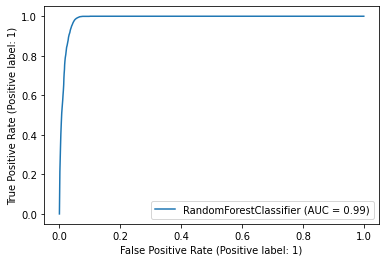

In [680]:
## roc-curve
plot_roc_curve(rf_log,X_train, y_train)
plt.show()

- Model is over-fitting. 
- Let's go for hyper parameter tuning

### Hyperparameter Tuning

In [681]:
## defining parameter grid
params = {
    'max_depth': [9,10,11,12,13],
    'min_samples_split': [1,2,3,5],
    'n_estimators': [70,90,100,110,120,130]
}

In [682]:
## defining grid search
grid_search = GridSearchCV(estimator=rf_log,param_grid=params,cv=5,scoring = 'roc_auc',
                           verbose=1, n_jobs=-1)

In [683]:
## running grid search
grid_search.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [70, 90, 100, 110, 120, 130]},
             scoring='roc_auc', verbose=1)

In [684]:
## best estimator as per grid search
rf_log_best = grid_search.best_estimator_
rf_log_best

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=130,
                       n_jobs=-1, random_state=42)

#### Deriving feature importance

In [685]:
## array of feature importance
rf_log_best.feature_importances_

array([3.93911962e-03, 3.42188271e-03, 3.53271886e-02, 3.54440481e-03,
       3.08527289e-03, 4.52771889e-03, 2.54950838e-03, 3.37350875e-03,
       3.31143103e-03, 1.90757743e-03, 2.98919668e-03, 4.29906487e-02,
       1.63893703e-03, 4.10827080e-03, 4.63023304e-02, 2.82541363e-03,
       2.64540783e-03, 2.49746556e-02, 1.92954795e-03, 2.29951927e-03,
       7.79843007e-03, 1.21446650e-03, 1.83278664e-03, 2.16580908e-03,
       1.06349201e-03, 1.07193353e-03, 1.01947898e-03, 3.97101889e-03,
       3.55290272e-03, 3.50765452e-02, 2.44032728e-03, 2.08891334e-03,
       1.55622853e-03, 2.62818257e-03, 2.51312084e-03, 1.96758762e-03,
       1.16943077e-03, 9.28134948e-04, 1.10184094e-03, 3.73589758e-03,
       4.07053538e-03, 3.44824063e-03, 8.59506891e-04, 8.12690724e-04,
       3.70175424e-03, 1.49527834e-03, 1.83382588e-03, 1.88971946e-03,
       1.52823602e-03, 4.06107846e-04, 2.31837649e-03, 3.45694850e-03,
       2.73685931e-03, 3.74376030e-02, 2.85092192e-03, 3.26006876e-03,
      

In [686]:
## Creating dataframe to display feature importance
df = pd.DataFrame({'Varname':X_train.columns,
                  'IMP':rf_log_best.feature_importances_})
df

,Varname,IMP
0,arpu_6,0.003939
1,arpu_7,0.003422
2,arpu_8,0.035327
3,onnet_mou_6,0.003544
4,onnet_mou_7,0.003085
5,onnet_mou_8,0.004528
6,offnet_mou_6,0.002550
7,offnet_mou_7,0.003374
8,offnet_mou_8,0.003311
9,roam_ic_mou_6,0.001908


In [687]:
## sorting the dataframe and resetting the index
df_feat = df.sort_values(by='IMP',ascending=False)
df_feat.reset_index(inplace=True)

In [688]:
## head
df_feat.head()

,index,Varname,IMP
0,56,loc_ic_t2t_mou_8,0.052428
1,14,roam_og_mou_8,0.046302
2,80,total_ic_mou_8,0.044949
3,11,roam_ic_mou_8,0.042991
4,95,total_rech_amt_8,0.042399


In [689]:
## making a list of top30 features
top30_features = list(df_feat['Varname'].iloc[0:30])

In [690]:
## printing the list of top 30 features
print(top30_features)

['loc_ic_t2t_mou_8', 'roam_og_mou_8', 'total_ic_mou_8', 'roam_ic_mou_8', 'total_rech_amt_8', 'total_og_mou_8', 'arpu_8', 'loc_og_mou_8', 'roam_og_mou_diff', 'loc_ic_mou_8', 'total_rech_amt_diff', 'loc_og_t2t_mou_8', 'roam_ic_mou_diff', 'total_ic_mou_diff', 'max_rech_amt_8', 'last_day_rch_amt_8', 'arpu_diff', 'total_og_mou_diff', 'std_ic_mou_8', 'loc_ic_t2m_mou_8', 'std_og_mou_diff', 'std_ic_t2t_mou_8', 'loc_ic_mou_diff', 'av_rech_amt_data_8', 'max_rech_amt_diff', 'onnet_mou_diff', 'loc_og_t2m_mou_8', 'vol_2g_mb_8', 'total_rech_num_diff', 'offnet_mou_diff']


- So these are the top 30 features with which we will build the logistic regression model

####  Creating new X_train and X_test of top 30 features

In [691]:
## X_train for 30 features
X_train30 = X_train[top30_features]
X_train30.shape

(22208, 30)

In [692]:
## shape
y_train.shape

(22208,)

In [693]:
## X_test for 30 features
X_test30 = X_test[top30_features]
X_test30.shape

(5552, 30)

In [694]:
## checking categorical and continous varaibles
X_train30.nunique()

loc_ic_t2t_mou_8        8779
roam_og_mou_8           3929
total_ic_mou_8         15472
roam_ic_mou_8           3507
total_rech_amt_8        2004
total_og_mou_8         17175
arpu_8                 20843
loc_og_mou_8           14944
roam_og_mou_diff        7567
loc_ic_mou_8           15450
total_rech_amt_diff     3597
loc_og_t2t_mou_8        9325
roam_ic_mou_diff        7060
total_ic_mou_diff      20752
max_rech_amt_8           165
last_day_rch_amt_8       155
arpu_diff              22159
total_og_mou_diff      20929
std_ic_mou_8            7141
loc_ic_t2m_mou_8       13414
std_og_mou_diff        16536
std_ic_t2t_mou_8        4323
loc_ic_mou_diff        20903
av_rech_amt_data_8       753
max_rech_amt_diff       1313
onnet_mou_diff         19265
loc_og_t2m_mou_8       13236
vol_2g_mb_8             7966
total_rech_num_diff      177
offnet_mou_diff        21056
dtype: int64

- No categorical column in top 30 features.

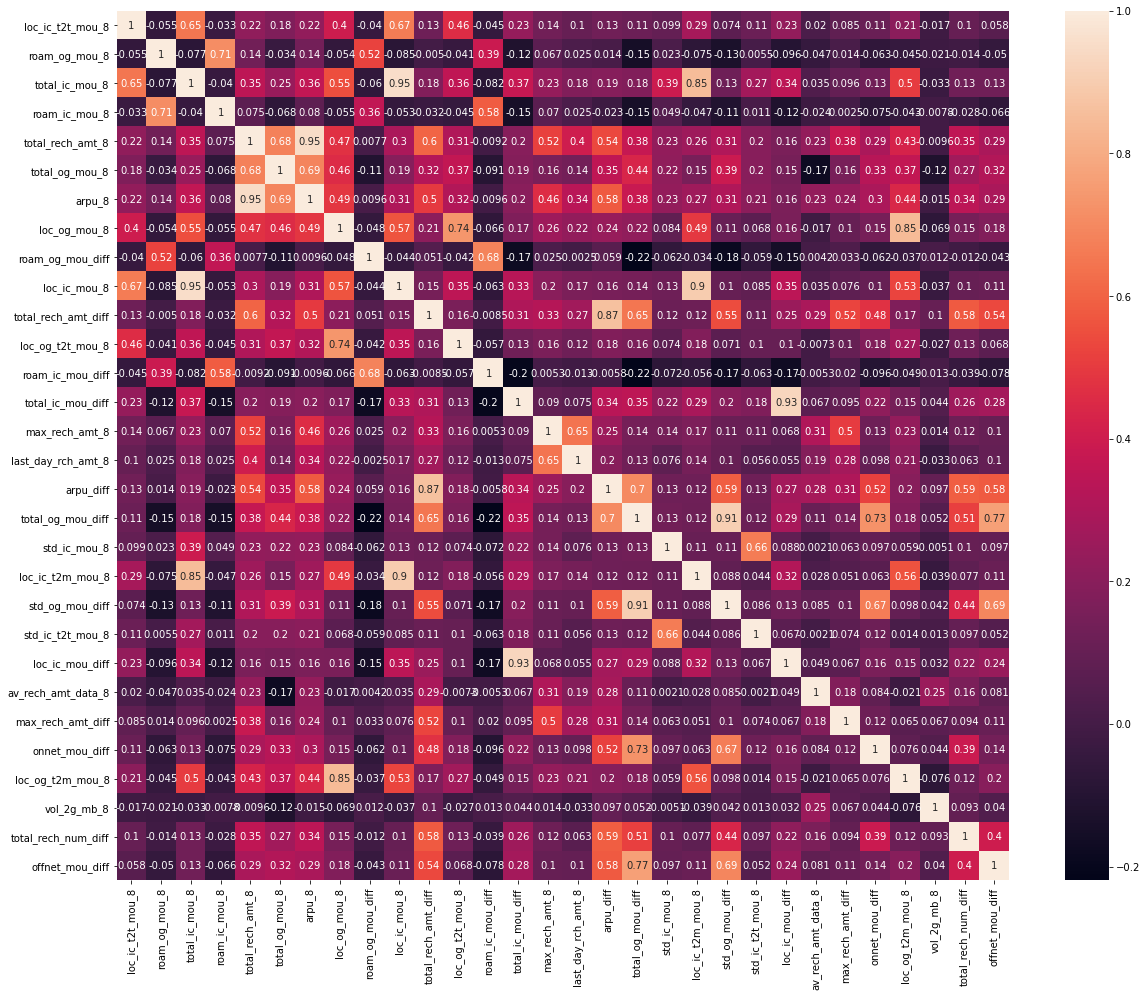

In [695]:
## checking correaltions
plt.figure(figsize=(20,16))
sns.heatmap(X_train30.corr(),annot=True)
plt.show()

In [696]:
## correlations higher than .7
cor = X_train30.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.70)].sort_values()

total_og_mou_diff  arpu_diff              0.702852
roam_ic_mou_8      roam_og_mou_8          0.712676
onnet_mou_diff     total_og_mou_diff      0.726358
loc_og_t2t_mou_8   loc_og_mou_8           0.736691
offnet_mou_diff    total_og_mou_diff      0.765402
loc_og_t2m_mou_8   loc_og_mou_8           0.846970
loc_ic_t2m_mou_8   total_ic_mou_8         0.848319
arpu_diff          total_rech_amt_diff    0.866186
loc_ic_t2m_mou_8   loc_ic_mou_8           0.896301
std_og_mou_diff    total_og_mou_diff      0.907975
loc_ic_mou_diff    total_ic_mou_diff      0.930223
arpu_8             total_rech_amt_8       0.951011
loc_ic_mou_8       total_ic_mou_8         0.954794
dtype: float64

- High correlations exist, lets eliminate them during mode building

### Building Logistic Regression Model
- We will be building the model using statsmodel.api
- We will filter down to the final model iteratively by repeatedly eliminating the variables having high p-values and high VIF scores.

In [756]:
## building the first model
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train30)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22177
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3941.9
Date:                Wed, 30 Jun 2021   Deviance:                       7883.8
Time:                        12:33:14   Pearson chi2:                 2.68e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0335      0.068    -59.114      0.000      -4.167      -3.900
loc_ic_t2t_mou_8       -0.4161      0.342     -1.216      0.224      -1.087       0.255
roam_og_mou_8           0.1978      0.038      5.197      0.000       0.123       0.272
total_ic_mou_8         -2.4763      0.669     -3.702      0.000      -3.787      -1.165
roam_ic_mou_8           0.0342      0.040      0.863      0.388      -0.043       0.112
total_rech_amt_8       -0.4415      0.232     -1.905      0.057      -0.896       0.013
total_og_mou_8         -0.1631      0.073     -2.239      0.025      -0.306      -0.020
arpu_8                  0.4905      0.214      2.291      0.022       0.071       0.910
loc_og_mou_8           -0.1677      1.351     -0.124      0.901      -2.815       2.480
roam_og_mou_diff        0.1637      0.218      0.750      0.453      -0.264       0.592
loc_ic_mou_8            1.2689      0.888      1.429      0.153      -0.471       3.009
total_rech_amt_diff     0.1356      0.134      1.011      0.312      -0.127       0.398
loc_og_t2t_mou_8       -0.5938      0.760     -0.781      0.435      -2.083       0.896
roam_ic_mou_diff       -0.0840      0.043     -1.944      0.052      -0.169       0.001
total_ic_mou_diff      -0.4716      0.092     -5.123      0.000      -0.652      -0.291
max_rech_amt_8          0.3142      0.056      5.642      0.000       0.205       0.423
last_day_rch_amt_8     -0.3960      0.054     -7.352      0.000      -0.502      -0.290
arpu_diff              -0.2137      0.120     -1.780      0.075      -0.449       0.022
total_og_mou_diff       1.6907      1.398      1.210      0.226      -1.049       4.430
std_ic_mou_8            0.3930      0.193      2.040      0.041       0.015       0.771
loc_ic_t2m_mou_8        0.0897      0.525      0.171      0.864      -0.939       1.118
std_og_mou_diff        -0.0158      0.088     -0.180      0.858      -0.188       0.157
std_ic_t2t_mou_8       -0.4966      0.120     -4.146      0.000      -0.731      -0.262
loc_ic_mou_diff         0.1813      0.093      1.945      0.052      -0.001       0.364
av_rech_amt_data_8     -0.8265      0.070    -11.850      0.000      -0.963      -0.690
max_rech_amt_diff      -0.1234      0.042     -2.939      0.003      -0.206      -0.041
onnet_mou_diff         -1.1842      0.886     -1.337      0.181      -2.920       0.552
loc_og_t2m_mou_8       -0.0825      0.945     -0.087      0.930      -1.934       1.769
vol_2g_mb_8            -0.3008      0.068     -4.439      0.000      -0.434      -0.168
total_rech_num_diff    -0.2253      0.035     -6.470      0.000      -0.294      -0.157
offnet_mou_diff        -1.2355      0.953     -1.297      0.195      -3.103       0.632
=======================================================================================
"""

- The highest p-value is for loc_og_mou_8.
- So let's drop this variable and again build the model

In [734]:
## dropping loc_og_mou_8
X_train29 = X_train30.drop('loc_og_mou_8',axis=1)
X_train29.shape

(22208, 29)

In [735]:
## building the second model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train29)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22178
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3941.9
Date:                Wed, 30 Jun 2021   Deviance:                       7883.8
Time:                        12:24:34   Pearson chi2:                 2.69e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0333      0.068    -59.120      0.000      -4.167      -3.900
loc_ic_t2t_mou_8       -0.4060      0.333     -1.219      0.223      -1.059       0.247
roam_og_mou_8           0.1980      0.038      5.207      0.000       0.123       0.272
total_ic_mou_8         -2.4750      0.669     -3.702      0.000      -3.785      -1.165
roam_ic_mou_8           0.0343      0.040      0.864      0.388      -0.043       0.112
total_rech_amt_8       -0.4405      0.232     -1.902      0.057      -0.894       0.013
total_og_mou_8         -0.1625      0.073     -2.236      0.025      -0.305      -0.020
arpu_8                  0.4892      0.214      2.288      0.022       0.070       0.908
roam_og_mou_diff        0.1642      0.218      0.752      0.452      -0.264       0.592
loc_ic_mou_8            1.2453      0.868      1.435      0.151      -0.456       2.947
total_rech_amt_diff     0.1360      0.134      1.015      0.310      -0.127       0.399
loc_og_t2t_mou_8       -0.6861      0.159     -4.314      0.000      -0.998      -0.374
roam_ic_mou_diff       -0.0840      0.043     -1.943      0.052      -0.169       0.001
total_ic_mou_diff      -0.4715      0.092     -5.122      0.000      -0.652      -0.291
max_rech_amt_8          0.3134      0.055      5.664      0.000       0.205       0.422
last_day_rch_amt_8     -0.3961      0.054     -7.356      0.000      -0.502      -0.291
arpu_diff              -0.2140      0.120     -1.783      0.075      -0.449       0.021
total_og_mou_diff       1.6941      1.398      1.212      0.225      -1.045       4.433
std_ic_mou_8            0.3923      0.193      2.038      0.042       0.015       0.770
loc_ic_t2m_mou_8        0.1059      0.509      0.208      0.835      -0.892       1.104
std_og_mou_diff        -0.0156      0.088     -0.177      0.860      -0.188       0.157
std_ic_t2t_mou_8       -0.4960      0.120     -4.145      0.000      -0.731      -0.261
loc_ic_mou_diff         0.1813      0.093      1.945      0.052      -0.001       0.364
av_rech_amt_data_8     -0.8260      0.070    -11.862      0.000      -0.963      -0.690
max_rech_amt_diff      -0.1232      0.042     -2.937      0.003      -0.205      -0.041
onnet_mou_diff         -1.1865      0.885     -1.340      0.180      -2.922       0.549
loc_og_t2m_mou_8       -0.1993      0.087     -2.288      0.022      -0.370      -0.029
vol_2g_mb_8            -0.3007      0.068     -4.438      0.000      -0.434      -0.168
total_rech_num_diff    -0.2253      0.035     -6.471      0.000      -0.294      -0.157
offnet_mou_diff        -1.2380      0.953     -1.299      0.194      -3.105       0.629
=======================================================================================
"""

- std_og_mou_diff has a high p-value 
- Let's drop it.

In [736]:
## dropping std_og_mou_diff
X_train28 = X_train29.drop('std_og_mou_diff',axis=1)
X_train28.shape

(22208, 28)

In [737]:
### third model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train28)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22179
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3941.9
Date:                Wed, 30 Jun 2021   Deviance:                       7883.8
Time:                        12:25:44   Pearson chi2:                 2.65e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0339      0.068    -59.171      0.000      -4.167      -3.900
loc_ic_t2t_mou_8       -0.4048      0.333     -1.215      0.224      -1.058       0.248
roam_og_mou_8           0.1980      0.038      5.209      0.000       0.124       0.273
total_ic_mou_8         -2.4644      0.665     -3.706      0.000      -3.768      -1.161
roam_ic_mou_8           0.0340      0.040      0.859      0.390      -0.044       0.112
total_rech_amt_8       -0.4406      0.232     -1.902      0.057      -0.895       0.013
total_og_mou_8         -0.1618      0.073     -2.230      0.026      -0.304      -0.020
arpu_8                  0.4885      0.214      2.284      0.022       0.069       0.908
roam_og_mou_diff        0.1756      0.208      0.842      0.400      -0.233       0.584
loc_ic_mou_8            1.2318      0.864      1.425      0.154      -0.462       2.926
total_rech_amt_diff     0.1360      0.134      1.015      0.310      -0.127       0.399
loc_og_t2t_mou_8       -0.6855      0.159     -4.317      0.000      -0.997      -0.374
roam_ic_mou_diff       -0.0841      0.043     -1.946      0.052      -0.169       0.001
total_ic_mou_diff      -0.4717      0.092     -5.125      0.000      -0.652      -0.291
max_rech_amt_8          0.3135      0.055      5.667      0.000       0.205       0.422
last_day_rch_amt_8     -0.3961      0.054     -7.356      0.000      -0.502      -0.291
arpu_diff              -0.2127      0.120     -1.775      0.076      -0.447       0.022
total_og_mou_diff       1.7536      1.356      1.293      0.196      -0.905       4.412
std_ic_mou_8            0.3895      0.192      2.032      0.042       0.014       0.765
loc_ic_t2m_mou_8        0.1073      0.509      0.211      0.833      -0.891       1.106
std_ic_t2t_mou_8       -0.4948      0.119     -4.145      0.000      -0.729      -0.261
loc_ic_mou_diff         0.1843      0.092      2.010      0.044       0.005       0.364
av_rech_amt_data_8     -0.8257      0.070    -11.863      0.000      -0.962      -0.689
max_rech_amt_diff      -0.1232      0.042     -2.938      0.003      -0.205      -0.041
onnet_mou_diff         -1.2347      0.842     -1.466      0.143      -2.886       0.416
loc_og_t2m_mou_8       -0.2001      0.087     -2.300      0.021      -0.371      -0.030
vol_2g_mb_8            -0.3006      0.068     -4.437      0.000      -0.433      -0.168
total_rech_num_diff    -0.2253      0.035     -6.471      0.000      -0.294      -0.157
offnet_mou_diff        -1.2896      0.907     -1.422      0.155      -3.067       0.488
=======================================================================================
"""

- loc_ic_t2m_mou_8 has a p-value 
- Let's drop this

In [738]:
## dropping loc_ic_t2m_mou_8
X_train27 = X_train28.drop('loc_ic_t2m_mou_8',axis=1)
X_train27.shape

(22208, 27)

In [739]:
### Fourth model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train27)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22180
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3941.9
Date:                Wed, 30 Jun 2021   Deviance:                       7883.9
Time:                        12:26:28   Pearson chi2:                 2.63e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0338      0.068    -59.177      0.000      -4.167      -3.900
loc_ic_t2t_mou_8       -0.4624      0.189     -2.444      0.015      -0.833      -0.092
roam_og_mou_8           0.1981      0.038      5.210      0.000       0.124       0.273
total_ic_mou_8         -2.4629      0.665     -3.705      0.000      -3.766      -1.160
roam_ic_mou_8           0.0341      0.040      0.860      0.390      -0.044       0.112
total_rech_amt_8       -0.4387      0.232     -1.895      0.058      -0.893       0.015
total_og_mou_8         -0.1616      0.073     -2.228      0.026      -0.304      -0.019
arpu_8                  0.4871      0.214      2.278      0.023       0.068       0.906
roam_og_mou_diff        0.1761      0.208      0.845      0.398      -0.233       0.585
loc_ic_mou_8            1.3627      0.600      2.271      0.023       0.186       2.539
total_rech_amt_diff     0.1352      0.134      1.009      0.313      -0.127       0.398
loc_og_t2t_mou_8       -0.6858      0.159     -4.321      0.000      -0.997      -0.375
roam_ic_mou_diff       -0.0842      0.043     -1.948      0.051      -0.169       0.001
total_ic_mou_diff      -0.4716      0.092     -5.124      0.000      -0.652      -0.291
max_rech_amt_8          0.3128      0.055      5.666      0.000       0.205       0.421
last_day_rch_amt_8     -0.3964      0.054     -7.362      0.000      -0.502      -0.291
arpu_diff              -0.2123      0.120     -1.772      0.076      -0.447       0.023
total_og_mou_diff       1.7571      1.356      1.295      0.195      -0.901       4.416
std_ic_mou_8            0.3889      0.192      2.030      0.042       0.013       0.765
std_ic_t2t_mou_8       -0.4946      0.119     -4.144      0.000      -0.729      -0.261
loc_ic_mou_diff         0.1841      0.092      2.007      0.045       0.004       0.364
av_rech_amt_data_8     -0.8258      0.070    -11.865      0.000      -0.962      -0.689
max_rech_amt_diff      -0.1228      0.042     -2.932      0.003      -0.205      -0.041
onnet_mou_diff         -1.2368      0.842     -1.468      0.142      -2.888       0.414
loc_og_t2m_mou_8       -0.1988      0.087     -2.292      0.022      -0.369      -0.029
vol_2g_mb_8            -0.3006      0.068     -4.436      0.000      -0.433      -0.168
total_rech_num_diff    -0.2251      0.035     -6.467      0.000      -0.293      -0.157
offnet_mou_diff        -1.2920      0.907     -1.425      0.154      -3.069       0.485
=======================================================================================
"""

In [740]:
## VIF score for Fourth model
## importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor
## checking VIF 
vif = pd.DataFrame()
X = X_train27
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_og_mou_diff,3607.00
26,offnet_mou_diff,1616.09
22,onnet_mou_diff,1390.14
7,roam_og_mou_diff,85.60
2,total_ic_mou_8,81.14
8,loc_ic_mou_8,69.83
4,total_rech_amt_8,57.23
6,arpu_8,52.58
9,total_rech_amt_diff,22.88
15,arpu_diff,18.67


- total_og_mou_diff has a very high VIF.
- Let's drop it.

In [741]:
## dropping total_og_mou_diff
X_train26 = X_train27.drop('total_og_mou_diff',axis=1)
X_train26.shape

(22208, 26)

In [742]:
## Fifth Model
logm5 = sm.GLM(y_train,(sm.add_constant(X_train26)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22181
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3942.8
Date:                Wed, 30 Jun 2021   Deviance:                       7885.5
Time:                        12:27:11   Pearson chi2:                 2.74e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0298      0.068    -59.211      0.000      -4.163      -3.896
loc_ic_t2t_mou_8       -0.4618      0.189     -2.437      0.015      -0.833      -0.090
roam_og_mou_8           0.1968      0.038      5.179      0.000       0.122       0.271
total_ic_mou_8         -2.4884      0.665     -3.740      0.000      -3.793      -1.184
roam_ic_mou_8           0.0368      0.040      0.930      0.352      -0.041       0.114
total_rech_amt_8       -0.4419      0.231     -1.913      0.056      -0.895       0.011
total_og_mou_8         -0.1611      0.073     -2.219      0.026      -0.303      -0.019
arpu_8                  0.4892      0.213      2.296      0.022       0.072       0.907
roam_og_mou_diff       -0.0895      0.038     -2.373      0.018      -0.163      -0.016
loc_ic_mou_8            1.3816      0.601      2.299      0.021       0.204       2.559
total_rech_amt_diff     0.1405      0.134      1.053      0.292      -0.121       0.402
loc_og_t2t_mou_8       -0.6926      0.159     -4.352      0.000      -1.005      -0.381
roam_ic_mou_diff       -0.0876      0.043     -2.029      0.042      -0.172      -0.003
total_ic_mou_diff      -0.4411      0.089     -4.953      0.000      -0.616      -0.267
max_rech_amt_8          0.3167      0.055      5.757      0.000       0.209       0.424
last_day_rch_amt_8     -0.3931      0.054     -7.331      0.000      -0.498      -0.288
arpu_diff              -0.2096      0.120     -1.753      0.080      -0.444       0.025
std_ic_mou_8            0.3951      0.192      2.061      0.039       0.019       0.771
std_ic_t2t_mou_8       -0.4950      0.119     -4.147      0.000      -0.729      -0.261
loc_ic_mou_diff         0.1554      0.089      1.744      0.081      -0.019       0.330
av_rech_amt_data_8     -0.8141      0.069    -11.841      0.000      -0.949      -0.679
max_rech_amt_diff      -0.1268      0.042     -3.034      0.002      -0.209      -0.045
onnet_mou_diff         -0.1464      0.032     -4.509      0.000      -0.210      -0.083
loc_og_t2m_mou_8       -0.2009      0.087     -2.314      0.021      -0.371      -0.031
vol_2g_mb_8            -0.3058      0.068     -4.512      0.000      -0.439      -0.173
total_rech_num_diff    -0.2218      0.035     -6.383      0.000      -0.290      -0.154
offnet_mou_diff        -0.1180      0.035     -3.415      0.001      -0.186      -0.050
=======================================================================================
"""

- Now all the values are below .5.
- Let's check the VIF scores as well

In [743]:
## VIF score for fifth model
vif = pd.DataFrame()
X = X_train26
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_ic_mou_8,80.98
8,loc_ic_mou_8,69.71
4,total_rech_amt_8,57.21
6,arpu_8,52.57
9,total_rech_amt_diff,22.87
15,arpu_diff,18.66
12,total_ic_mou_diff,10.01
18,loc_ic_mou_diff,9.25
16,std_ic_mou_8,7.23
5,total_og_mou_8,3.54


- total_ic_mou_8 has a very high VIF
- Let's drop this

In [744]:
## Dropping total_ic_mou_8
X_train25 = X_train26.drop('total_ic_mou_8',axis=1)
X_train25.shape

(22208, 25)

In [745]:
## Sixth Model
logm6 = sm.GLM(y_train,(sm.add_constant(X_train25)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22182
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3951.7
Date:                Wed, 30 Jun 2021   Deviance:                       7903.3
Time:                        12:28:08   Pearson chi2:                 1.60e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0768      0.068    -60.087      0.000      -4.210      -3.944
loc_ic_t2t_mou_8       -0.5500      0.197     -2.790      0.005      -0.936      -0.164
roam_og_mou_8           0.2104      0.038      5.549      0.000       0.136       0.285
roam_ic_mou_8           0.0359      0.040      0.907      0.365      -0.042       0.113
total_rech_amt_8       -0.4767      0.230     -2.075      0.038      -0.927      -0.026
total_og_mou_8         -0.1263      0.072     -1.762      0.078      -0.267       0.014
arpu_8                  0.4781      0.213      2.249      0.024       0.062       0.895
roam_og_mou_diff       -0.0940      0.038     -2.491      0.013      -0.168      -0.020
loc_ic_mou_8           -0.8200      0.130     -6.322      0.000      -1.074      -0.566
total_rech_amt_diff     0.1599      0.133      1.203      0.229      -0.101       0.420
loc_og_t2t_mou_8       -0.9359      0.162     -5.780      0.000      -1.253      -0.619
roam_ic_mou_diff       -0.0855      0.043     -1.984      0.047      -0.170      -0.001
total_ic_mou_diff      -0.4599      0.088     -5.239      0.000      -0.632      -0.288
max_rech_amt_8          0.3190      0.055      5.764      0.000       0.211       0.428
last_day_rch_amt_8     -0.3910      0.054     -7.263      0.000      -0.497      -0.286
arpu_diff              -0.2168      0.119     -1.826      0.068      -0.449       0.016
std_ic_mou_8           -0.2398      0.092     -2.620      0.009      -0.419      -0.060
std_ic_t2t_mou_8       -0.6215      0.122     -5.079      0.000      -0.861      -0.382
loc_ic_mou_diff         0.1749      0.088      1.988      0.047       0.002       0.347
av_rech_amt_data_8     -0.8027      0.069    -11.680      0.000      -0.937      -0.668
max_rech_amt_diff      -0.1303      0.042     -3.123      0.002      -0.212      -0.049
onnet_mou_diff         -0.1531      0.032     -4.723      0.000      -0.217      -0.090
loc_og_t2m_mou_8       -0.1573      0.083     -1.896      0.058      -0.320       0.005
vol_2g_mb_8            -0.3118      0.068     -4.586      0.000      -0.445      -0.179
total_rech_num_diff    -0.2222      0.035     -6.409      0.000      -0.290      -0.154
offnet_mou_diff        -0.1170      0.034     -3.399      0.001      -0.184      -0.050
=======================================================================================
"""

In [746]:
## VIF score for Sixth model 
vif = pd.DataFrame()
X = X_train25
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_rech_amt_8,57.21
5,arpu_8,52.53
8,total_rech_amt_diff,22.86
14,arpu_diff,18.66
11,total_ic_mou_diff,9.58
17,loc_ic_mou_diff,8.90
4,total_og_mou_8,3.52
2,roam_ic_mou_8,3.42
1,roam_og_mou_8,3.25
10,roam_ic_mou_diff,3.14


- total_rech_amt_8 has a high VIF
- Let's drop this

In [747]:
## dropping total_rech_amt_8 
X_train24 = X_train25.drop('total_rech_amt_8',axis=1)
X_train24.shape

(22208, 24)

In [748]:
## Seventh model
logm7 = sm.GLM(y_train,(sm.add_constant(X_train24)), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22183
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3953.7
Date:                Wed, 30 Jun 2021   Deviance:                       7907.4
Time:                        12:28:44   Pearson chi2:                 1.63e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0723      0.068    -60.113      0.000      -4.205      -3.940
loc_ic_t2t_mou_8       -0.5579      0.197     -2.828      0.005      -0.945      -0.171
roam_og_mou_8           0.1987      0.037      5.333      0.000       0.126       0.272
roam_ic_mou_8           0.0396      0.039      1.004      0.315      -0.038       0.117
total_og_mou_8         -0.1536      0.070     -2.210      0.027      -0.290      -0.017
arpu_8                  0.0686      0.083      0.826      0.409      -0.094       0.231
roam_og_mou_diff       -0.0903      0.038     -2.401      0.016      -0.164      -0.017
loc_ic_mou_8           -0.8211      0.130     -6.329      0.000      -1.075      -0.567
total_rech_amt_diff    -0.0582      0.083     -0.699      0.484      -0.221       0.105
loc_og_t2t_mou_8       -0.9324      0.162     -5.758      0.000      -1.250      -0.615
roam_ic_mou_diff       -0.0882      0.043     -2.050      0.040      -0.173      -0.004
total_ic_mou_diff      -0.4612      0.088     -5.251      0.000      -0.633      -0.289
max_rech_amt_8          0.3008      0.054      5.558      0.000       0.195       0.407
last_day_rch_amt_8     -0.4022      0.054     -7.513      0.000      -0.507      -0.297
arpu_diff              -0.0237      0.077     -0.308      0.758      -0.175       0.127
std_ic_mou_8           -0.2405      0.092     -2.626      0.009      -0.420      -0.061
std_ic_t2t_mou_8       -0.6212      0.122     -5.079      0.000      -0.861      -0.381
loc_ic_mou_diff         0.1760      0.088      2.000      0.045       0.004       0.348
av_rech_amt_data_8     -0.7997      0.069    -11.641      0.000      -0.934      -0.665
max_rech_amt_diff      -0.1366      0.041     -3.299      0.001      -0.218      -0.055
onnet_mou_diff         -0.1503      0.032     -4.650      0.000      -0.214      -0.087
loc_og_t2m_mou_8       -0.1594      0.083     -1.925      0.054      -0.322       0.003
vol_2g_mb_8            -0.3121      0.068     -4.598      0.000      -0.445      -0.179
total_rech_num_diff    -0.2234      0.035     -6.453      0.000      -0.291      -0.156
offnet_mou_diff        -0.1152      0.034     -3.359      0.001      -0.182      -0.048
=======================================================================================
"""

In [749]:
## VIF score for Seventh model
vif = pd.DataFrame()
X = X_train24
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_diff,9.58
16,loc_ic_mou_diff,8.90
7,total_rech_amt_diff,6.67
13,arpu_diff,6.39
4,arpu_8,4.76
3,total_og_mou_8,3.44
2,roam_ic_mou_8,3.42
1,roam_og_mou_8,3.22
9,roam_ic_mou_diff,3.14
5,roam_og_mou_diff,2.89


- arpu_diff has a very-high p-value
- Let's drop it

In [757]:
## dropping arpu_diff
X_train23 = X_train24.drop('arpu_diff',axis=1)
X_train23.shape

(22208, 23)

In [758]:
## Eighth Model
logm8 = sm.GLM(y_train,(sm.add_constant(X_train23)), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22184
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3953.7
Date:                Wed, 30 Jun 2021   Deviance:                       7907.5
Time:                        12:37:18   Pearson chi2:                 1.66e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0735      0.068    -60.225      0.000      -4.206      -3.941
loc_ic_t2t_mou_8       -0.5577      0.197     -2.826      0.005      -0.944      -0.171
roam_og_mou_8           0.1994      0.037      5.360      0.000       0.126       0.272
roam_ic_mou_8           0.0397      0.039      1.006      0.314      -0.038       0.117
total_og_mou_8         -0.1501      0.069     -2.187      0.029      -0.285      -0.016
arpu_8                  0.0595      0.078      0.765      0.445      -0.093       0.212
roam_og_mou_diff       -0.0910      0.038     -2.423      0.015      -0.165      -0.017
loc_ic_mou_8           -0.8193      0.130     -6.324      0.000      -1.073      -0.565
total_rech_amt_diff    -0.0753      0.062     -1.212      0.225      -0.197       0.046
loc_og_t2t_mou_8       -0.9356      0.162     -5.786      0.000      -1.253      -0.619
roam_ic_mou_diff       -0.0886      0.043     -2.060      0.039      -0.173      -0.004
total_ic_mou_diff      -0.4628      0.088     -5.280      0.000      -0.635      -0.291
max_rech_amt_8          0.3036      0.053      5.684      0.000       0.199       0.408
last_day_rch_amt_8     -0.4014      0.053     -7.511      0.000      -0.506      -0.297
std_ic_mou_8           -0.2406      0.092     -2.626      0.009      -0.420      -0.061
std_ic_t2t_mou_8       -0.6210      0.122     -5.076      0.000      -0.861      -0.381
loc_ic_mou_diff         0.1765      0.088      2.006      0.045       0.004       0.349
av_rech_amt_data_8     -0.8007      0.069    -11.668      0.000      -0.935      -0.666
max_rech_amt_diff      -0.1342      0.041     -3.301      0.001      -0.214      -0.054
onnet_mou_diff         -0.1527      0.031     -4.873      0.000      -0.214      -0.091
loc_og_t2m_mou_8       -0.1595      0.083     -1.927      0.054      -0.322       0.003
vol_2g_mb_8            -0.3118      0.068     -4.594      0.000      -0.445      -0.179
total_rech_num_diff    -0.2241      0.035     -6.488      0.000      -0.292      -0.156
offnet_mou_diff        -0.1181      0.033     -3.582      0.000      -0.183      -0.053
=======================================================================================
"""

In [759]:
## VIF score for Eighth model
vif = pd.DataFrame()
X = X_train23
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_diff,9.50
15,loc_ic_mou_diff,8.88
7,total_rech_amt_diff,4.15
4,arpu_8,4.04
2,roam_ic_mou_8,3.42
3,total_og_mou_8,3.27
1,roam_og_mou_8,3.22
9,roam_ic_mou_diff,3.14
5,roam_og_mou_diff,2.87
6,loc_ic_mou_8,2.79


- total_ic_mou_diff has a high VIF and p-value
- Let's drop it

In [760]:
## dropping total_ic_mou_diff
X_train22 = X_train23.drop('total_ic_mou_diff',axis=1)
X_train22.shape

(22208, 22)

In [754]:
## Ninth Model
X_train22_sm = sm.add_constant(X_train22)
logm9 = sm.GLM(y_train,X_train22_sm, family = sm.families.Binomial())
model9 = logm9.fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22208
Model:                            GLM   Df Residuals:                    22185
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.7
Date:                Wed, 30 Jun 2021   Deviance:                       7935.4
Time:                        12:31:12   Pearson chi2:                 2.88e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0977      0.068    -60.286      0.000      -4.231      -3.964
loc_ic_t2t_mou_8       -0.5697      0.199     -2.858      0.004      -0.960      -0.179
roam_og_mou_8           0.1930      0.037      5.207      0.000       0.120       0.266
roam_ic_mou_8           0.0544      0.039      1.396      0.163      -0.022       0.131
total_og_mou_8         -0.1572      0.069     -2.285      0.022      -0.292      -0.022
arpu_8                  0.0673      0.078      0.864      0.388      -0.085       0.220
roam_og_mou_diff       -0.0810      0.037     -2.161      0.031      -0.155      -0.008
loc_ic_mou_8           -0.8160      0.129     -6.308      0.000      -1.070      -0.562
total_rech_amt_diff    -0.1024      0.062     -1.650      0.099      -0.224       0.019
loc_og_t2t_mou_8       -1.0092      0.164     -6.152      0.000      -1.331      -0.688
roam_ic_mou_diff       -0.0863      0.043     -2.018      0.044      -0.170      -0.002
max_rech_amt_8          0.3018      0.053      5.650      0.000       0.197       0.407
last_day_rch_amt_8     -0.4086      0.054     -7.629      0.000      -0.514      -0.304
std_ic_mou_8           -0.2369      0.088     -2.701      0.007      -0.409      -0.065
std_ic_t2t_mou_8       -0.6476      0.123     -5.281      0.000      -0.888      -0.407
loc_ic_mou_diff        -0.2462      0.037     -6.744      0.000      -0.318      -0.175
av_rech_amt_data_8     -0.8290      0.069    -12.039      0.000      -0.964      -0.694
max_rech_amt_diff      -0.1244      0.041     -3.073      0.002      -0.204      -0.045
onnet_mou_diff         -0.1630      0.031     -5.215      0.000      -0.224      -0.102
loc_og_t2m_mou_8       -0.1537      0.082     -1.868      0.062      -0.315       0.008
vol_2g_mb_8            -0.3083      0.068     -4.549      0.000      -0.441      -0.175
total_rech_num_diff    -0.2250      0.035     -6.514      0.000      -0.293      -0.157
offnet_mou_diff        -0.1199      0.033     -3.642      0.000      -0.184      -0.055
=======================================================================================
"""

In [761]:
## VIF score for Ninth model
vif = pd.DataFrame()
X = X_train22
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_amt_diff,4.14
4,arpu_8,4.04
2,roam_ic_mou_8,3.41
3,total_og_mou_8,3.26
1,roam_og_mou_8,3.21
9,roam_ic_mou_diff,3.14
5,roam_og_mou_diff,2.87
6,loc_ic_mou_8,2.78
10,max_rech_amt_8,2.68
16,max_rech_amt_diff,2.20


- All the p-values are below .5 and all the VIFs are also below 5!
- So we can consider model11 as being the final logistic regression model.

### Creating a dataframe with the actual churn flag and the predicted probabilities for the final logistic regression model

In [763]:
## making predictions for the model
y_train_pred = model9.predict(X_train22_sm).values.reshape(-1)
y_train_pred[:10]

array([2.26057790e-02, 4.35806485e-03, 4.68449802e-01, 3.86315614e-03,
       1.93691249e-01, 3.45281263e-06, 2.50445545e-03, 2.43615737e-02,
       4.88419430e-02, 2.16445535e-04])

In [764]:
## Creating dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_final_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.019108
1,0,0.004544
2,0,0.462141
3,0,0.003652
4,0,0.185811


In [765]:
## adding 'predicted column'
y_train_pred_final['predicted'] = model10.predict(X_train21_sm)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.019108,0.038261
1,0,0.004544,0.021850
2,0,0.462141,0.132323
3,0,0.003652,0.025567
4,0,0.185811,0.006100


In [766]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.019108,0
1,0,0.004544,0
2,0,0.462141,0
3,0,0.003652,0
4,0,0.185811,0


In [767]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)


0.9387157780979827

### Metrics Beyond Simple Accuracy

In [768]:
## confusion matrix
confuusion = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[20158,   245],
       [ 1146,   659]])

In [769]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [770]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.36509695290858724

In [771]:
# Let us calculate specificity
TN / float(TN+FP)

0.9879919619663775

In [772]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.012008038033622506


In [773]:
# positive predictive value 
print (TP / float(TP+FP))

0.7289823008849557


In [774]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9462072850168982


- Very High accuracy on the train set but low sensitivity or recall which is very important for the business.

### Finding Optimal Cutoff Point 
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [775]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019108,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004544,0,1,0,0,0,0,0,0,0,0,0
2,0,0.462141,0,1,1,1,1,1,0,0,0,0,0
3,0,0.003652,0,1,0,0,0,0,0,0,0,0,0
4,0,0.185811,0,1,1,0,0,0,0,0,0,0,0


In [776]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081277  1.000000  0.000000
0.1   0.1  0.855998  0.797784  0.861148
0.2   0.2  0.919669  0.650416  0.943489
0.3   0.3  0.933582  0.530748  0.969220
0.4   0.4  0.937500  0.430471  0.982356
0.5   0.5  0.938716  0.368421  0.989168
0.6   0.6  0.938265  0.325208  0.992501
0.7   0.7  0.934708  0.238227  0.996324
0.8   0.8  0.927639  0.126870  0.998481
0.9   0.9  0.921245  0.034349  0.999706


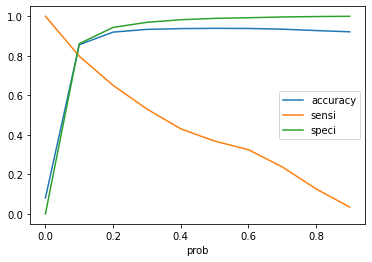

In [777]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Cut-off point at about .1 which is absymally low.

In [778]:
## creating a dataframe with cut-off value of .1
## Creating dataframe
y_train_pred_final1 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final1.head()
## adding 'predicted column'
y_train_pred_final1['predicted'] = model10.predict(X_train21_sm)
y_train_pred_final1.head()
# Creating new column 'predicted' with 1 if Churn_Prob > 0.1 else 0
y_train_pred_final1['predicted'] = y_train_pred_final1.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final1.head()

,Churn,Churn_Prob,predicted
0,0,0.022606,0
1,0,0.004358,0
2,0,0.468450,1
3,0,0.003863,0
4,0,0.193691,1


In [779]:
print(classification_report(y_train_pred_final1.Churn,y_train_pred_final1.predicted))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     20403
           1       0.33      0.80      0.47      1805

    accuracy                           0.85     22208
   macro avg       0.66      0.83      0.69     22208
weighted avg       0.93      0.85      0.88     22208



- With the very low cut-off of .1, the model is giving a recall score on the train set comparable to our best model 'best_under'.
- Let's see the performance on test-set

In [780]:
## defining X_test21
cols_22 = list(X_train22.columns)
X_test22 = X_test[cols_22]

In [781]:
X_test22_sm = sm.add_constant(X_test22)

In [782]:
## getting predictions on test-set
y_test_pred = model9.predict(X_test22_sm).values.reshape(-1)
y_test_pred[:10]

array([8.39892018e-03, 6.70108579e-01, 7.80663817e-04, 8.73606692e-03,
       1.35148873e-02, 7.47013136e-03, 3.58354634e-02, 4.16098099e-03,
       5.83557344e-02, 1.30086882e-06])

In [783]:
## creating a dataframe for test with cut-off value of .1
## Creating dataframe
y_test_pred_final1 = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final1.head()
## adding 'predicted column'
y_test_pred_final1['predicted'] = model9.predict(X_test22_sm)
y_test_pred_final1.head()
# Creating new column 'predicted' with 1 if Churn_Prob > 0.1 else 0
y_test_pred_final1['predicted'] = y_test_pred_final1.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final1.head()

,Churn,Churn_Prob,predicted
0,0,0.008399,0
1,0,0.670109,1
2,0,0.000781,0
3,0,0.008736,0
4,0,0.013515,0


In [784]:
print(classification_report(y_test_pred_final1.Churn,y_test_pred_final1.predicted))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5101
           1       0.34      0.80      0.48       451

    accuracy                           0.86      5552
   macro avg       0.66      0.83      0.70      5552
weighted avg       0.93      0.86      0.88      5552



In [785]:
matthews_corrcoef(y_test_pred_final1.Churn,y_test_pred_final1.predicted)

0.46143555817671467

- With a very low cut-off of .1, the logistic regression model is giving a recall of 80% comparable to our best model.
- However this approach is not statistically sound!
- Our best model with RandomForestClassifier using undersampling was more statistically sound as it gave a recall of 78% with an optimal cut-off close to .5 and it's Matthews coefficient has also slightly higher than the logistic regression model with very low cut-off of .1.
- So for the predictions we will use the RandomForestClassifier using undersampling,i.e., our best model.
- But we can derive feature importance about the KPIs from this logistic regression model.

### Deriving Feature Importance

In [786]:
## creating dataframe
df_features = pd.DataFrame(model9.params.sort_values(ascending=False))
df_features = df_features.reset_index()

In [787]:
## checking columns
df_features.columns

Index(['index', 0], dtype='object')

In [788]:
## renaming columns
df_features.rename(columns = {'index':'feature',0:'importance'},inplace=True)
df_features

,feature,importance
0,max_rech_amt_8,0.301839
1,roam_og_mou_8,0.192963
2,arpu_8,0.067313
3,roam_ic_mou_8,0.054445
4,roam_og_mou_diff,-0.081020
5,roam_ic_mou_diff,-0.086308
6,total_rech_amt_diff,-0.102404
7,offnet_mou_diff,-0.119921
8,max_rech_amt_diff,-0.124448
9,loc_og_t2m_mou_8,-0.153682


In [792]:
## dropping const
df_features.drop(22,inplace=True)

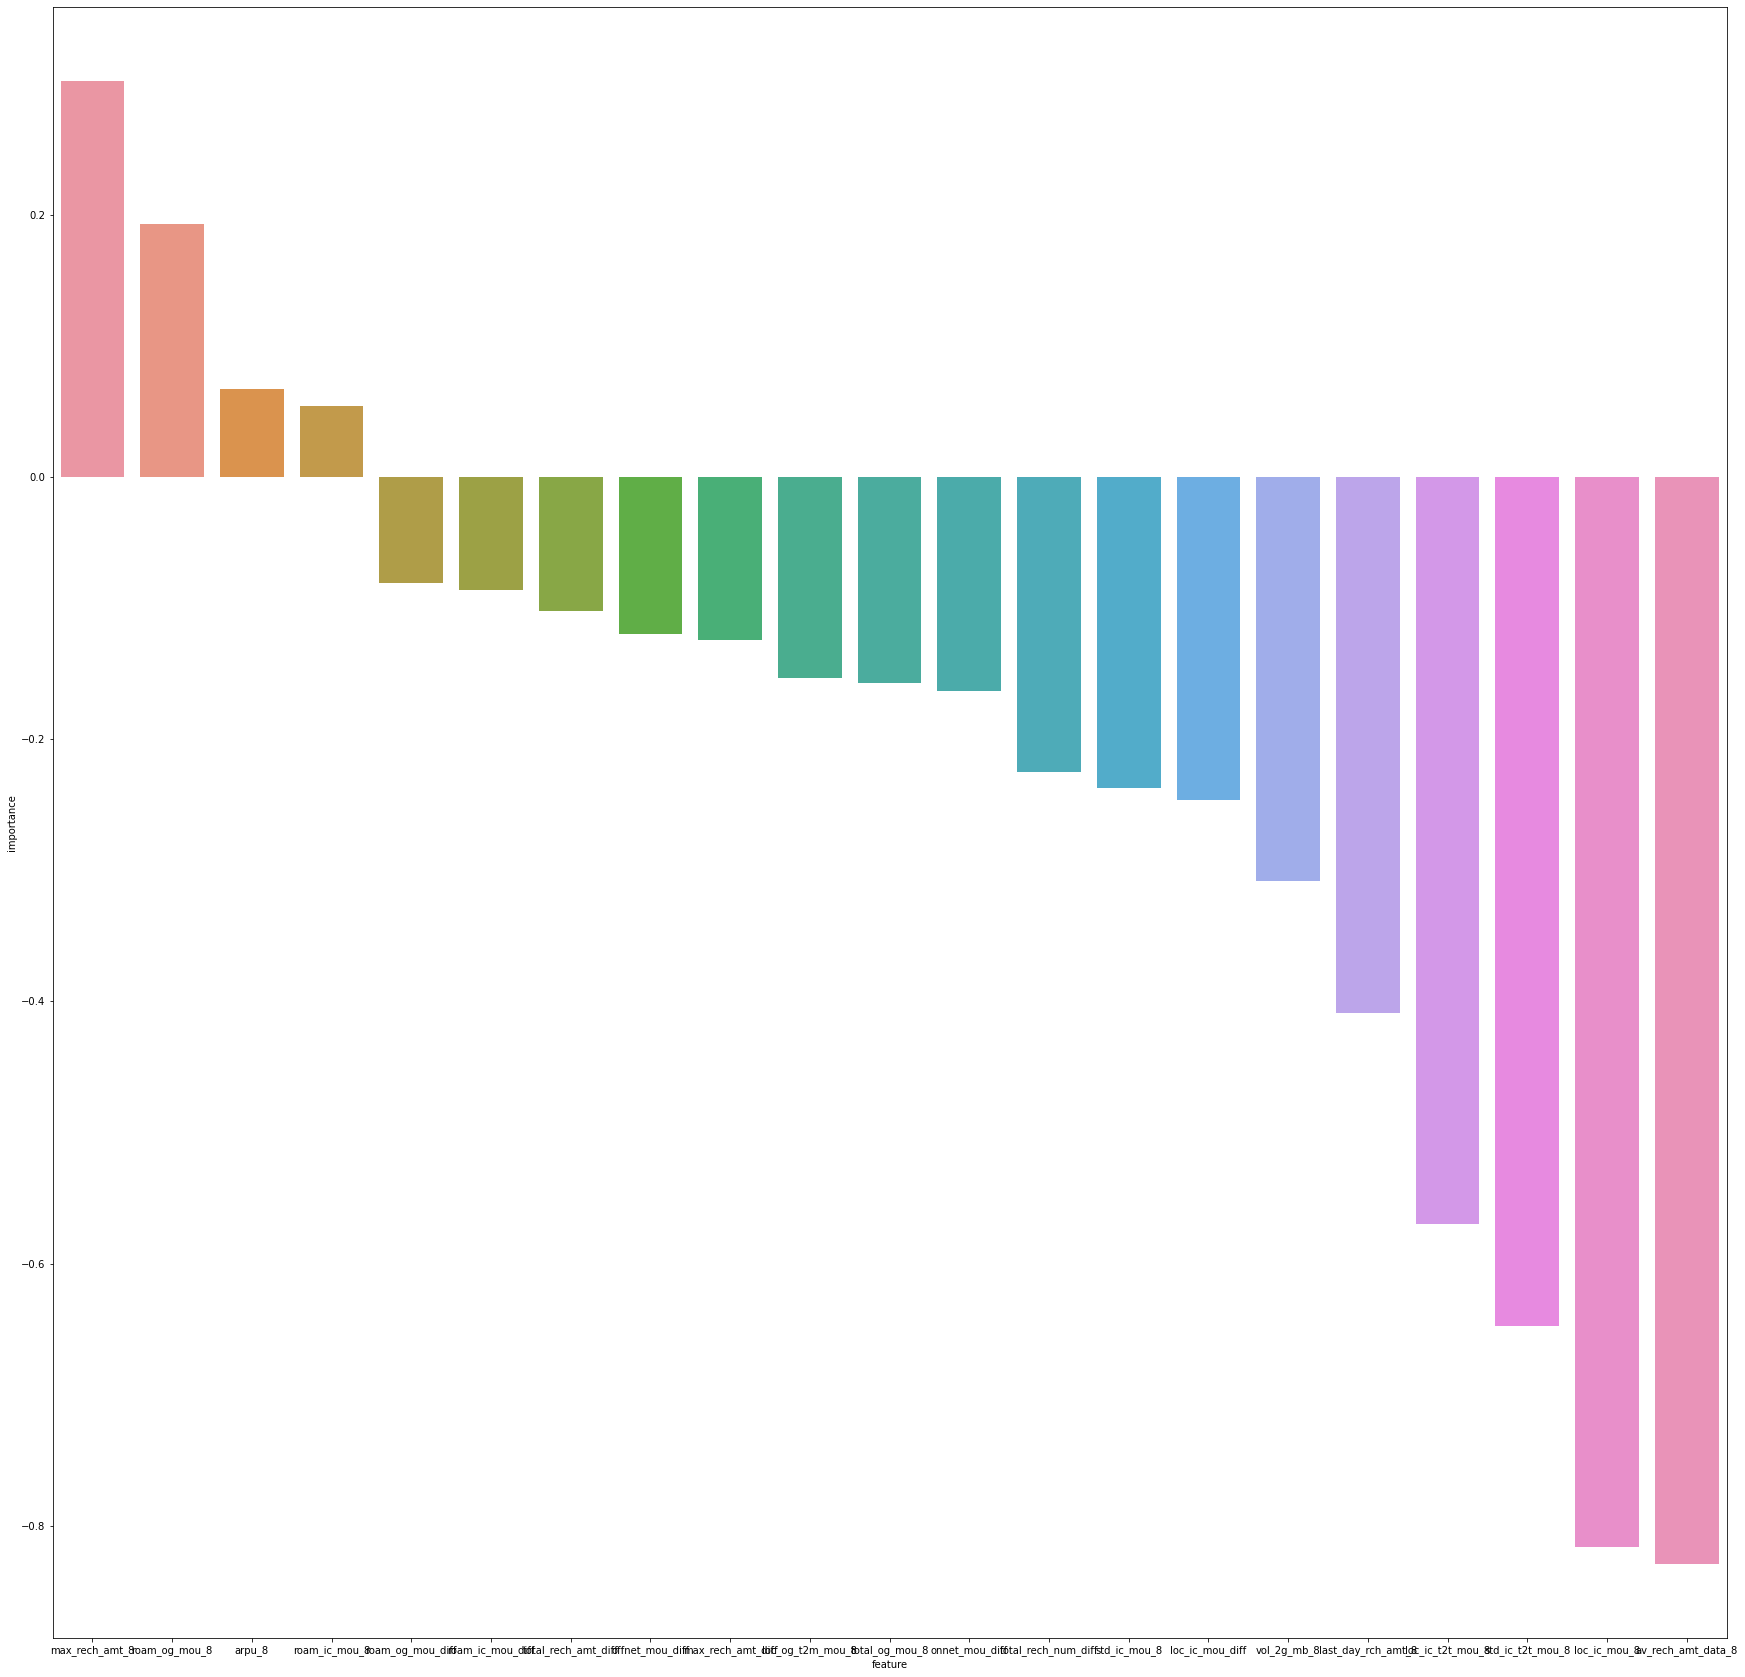

In [793]:
## plotting barplot to see the features
plt.figure(figsize=(30,30))
sns.barplot(x='feature', y='importance', data=df_features)
plt.show()

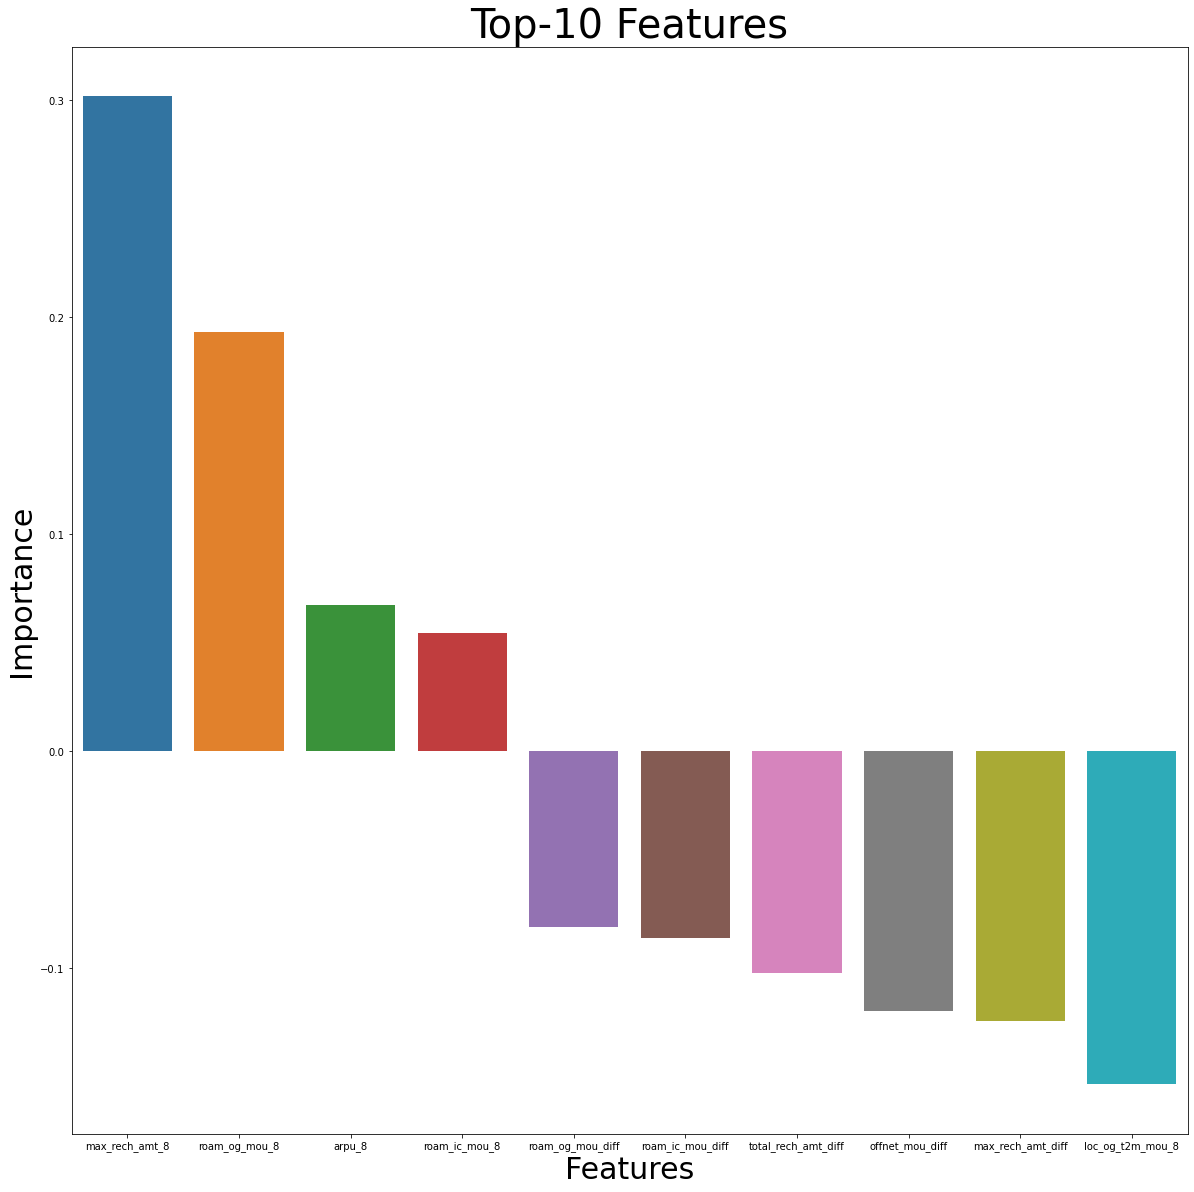

In [794]:
plt.figure(figsize=(20,20))
sns.barplot(x='feature', y='importance', data=df_features[:10])
plt.title('Top-10 Features',size=40)
plt.xlabel('Features', size=30)
plt.ylabel('Importance', size=30)
plt.show()

## VII. Conclusion : Business Insights

#### From the Model
- Company should pay attention to maximum recharge amount during the eighth month. Customers who are looking the churn would be dropping this amount.
- We have defined the difference varaibles as the difference between the 8th month variable and the average of 6th and 7th monthh variables.
- The averge revenue generated per user for the eight month is also a very strong indicator of churn.
- With the  total recharge amount difference going into the negative territory, we can expect the customer is likely to churn.
-Same applies for other difference parameters like Maximum recharge amount difference is also an indicator for churn. 

#### From EDA
- We also saw during the EDA stage that customers who are wiht the network for a long time are less likely to churn than the new customers. The company should focus on new customers more as they are more likely to churn.
- For the customers who churn, the apru drops steadily from months 6 to 7 to 8.
- The on-network minutes also drop steadily from months 6 to 8 for the churn customers
- The off network minutes also drop steadily from months 6 to 8 for the churn customers
-  Total incoming minutes virtually drop to zero in the eighth month for the churn customers.
